# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors.

Definition of all the features as provided by mlb.com

Runs - A player is awarded a run if he crosses the plate to score his team a run. When tallying runs scored, the way in which a player reached base is not considered. If a player reaches base by an error or a fielder's choice, as long as he comes around to score, he is still credited with a run. If a player enters the game as a pinch-runner and scores, he is also credited with a run.

At Bats - An official at-bat comes when a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice. (Whereas a plate appearance refers to each completed turn batting, regardless of the result.)

At-bats are used as the denominator when determining batting average and slugging percentage. Players who bat higher in the order will typically finish the season with more at-bats than players who hit toward the bottom. Similarly, players who walk infrequently also typically record a higher-than-usual number of at-bats in a season, because walks do not count as at-bats.

Hits - A hit occurs when a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice. There are four types of hits in baseball: singles, doubles, triples and home runs. All four are counted equally when deciphering batting average. If a player is thrown out attempting to take an extra base (e.g., turning a single into a double), that still counts as a hit.

Doubles - A batter is credited with a double when he hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.

Triples - Often called "the most exciting play in baseball," a triple occurs when a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.

Homeruns - A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error. In almost every instance of a home run, a batter hits the ball in the air over the outfield fence in fair territory.

Walks - A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. In the scorebook, a walk is denoted by the letters BB.

Strikeouts - A strikeout occurs when a pitcher throws any combination of three swinging or looking strikes to a hitter. ... However, even if the batter reaches first base safely, the pitcher and the batter are still credited with a strikeout in the scorebook. In the scorebook, a strikeout is denoted by the letter K.

Stolen Bases - A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

Runs Allowed - An inherited runner is any baserunner who is already on base when a relief pitcher enters the game. Any inherited runners who score against a relief pitcher are not charged to his ERA; however, there are a few statistics that take into account a pitcher's success at stranding runners on base.

Earned Runs - An earned run is any run that scores against a pitcher without the benefit of an error or a passed ball. Often, it is the judgment of the official scorer as to whether a specific run would've scored without the defensive mishap. If a pitcher exits a game with runners on base, any earned runs scored by those runners will count against him.

Earned Runs Allowed - Earned run average represents the number of earned runs a pitcher allows per nine innings -- with earned runs being any runs that scored without the aid of an error or a passed ball. ERA is the most commonly accepted statistical tool for evaluating pitchers.

Complete Games - A pitcher earns a complete game if he pitches the entire game for his team regardless of how long it lasts. If the game is shortened by rain or if it lasts into extra innings, it counts as a complete game if the pitcher was the only pitcher to record an appearance for his team.

The formula for finding ERA is: 9 x earned runs / innings pitched. If a pitcher exits a game with runners on base, any earned runs scored by those runners will count against him.

Shutouts - A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win. Because he recorded every out for his team and didn't allow a run, his team could only have won.

If a starting pitcher does not allow a run but is removed before the game ends, he is not given credit for a shutout. However, if the ensuing reliever(s) also do not allow a run, the team as a whole is credited with a shutout.

Saves - A save is awarded to the relief pitcher who finishes a game for the winning team, under certain circumstances. A pitcher cannot receive a save and a win in the same game.

A relief pitcher recording a save must preserve his team's lead while doing one of the following:

Enter the game with a lead of no more than three runs and pitch at least one inning.
Enter the game with the tying run in the on-deck circle, at the plate or on the bases.
Pitch at least three innings.

Errors - A fielder is given an error if, in the judgment of the official scorer, he fails to convert an out on a play that an average fielder should have made. Fielders can also be given errors if they make a poor play that allows one or more runners to advance on the bases. A batter does not necessarily need to reach base for a fielder to be given an error. If he drops a foul ball that extends an at-bat, that fielder can also be assessed an error.

-- Output: Number of predicted wins (W)

In [1]:
##The objective is to predict the number of wins based on the given input features.
##Hence its a regression problem with Wins as the target variable.

# Loading libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              #for plotting and EDA
import seaborn as sns                        #for plotting and Eda
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Baseball.csv')
df = pd.DataFrame(data = df)

In [4]:
df.head(20)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.shape

(30, 17)

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All columns are of int64 datatype except fot ERA which is float datatype.
Hence there are no categorical features in the dataset and all the features are continuous.

# Checking and Treating missing values

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values are present in the given dataset.

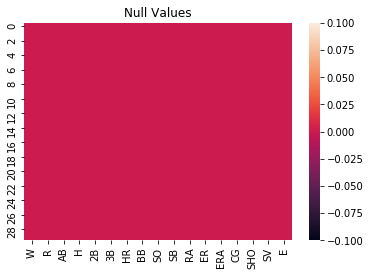

In [8]:
sns.heatmap(df.isnull())                                      #no null values present in dataset
plt.title('Null Values')
plt.show()

Visual representation for the missing values in the given dataset. As we can see the heatmap is red which corresponds to the value 0, hence no null values are present in the dataset.

# Describing the dataset

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


As we can observe that all the columns have the count value of 30 which further verifies the fact that there are no missing values in the dataset.

The mean of wins is almost 81 which is the mode of the data. The range of the wins is 63 - 100 and IQR of data is 74 - 87.75.

The mean of runs (R) is 688.23 which is around the mode of the data which is 689. The range of the data is 573 - 891 and IQR of data is 651.25 - 718.25.

The mean of at bats (AB) is 5385 which is less than the mode of the data, 5510. The range of the data is 5385 - 5649 and IQR of data is 5464 - 5570.

The mean of hits (H) is 1403.53 and the mode is 1382.50. The range of hits is 1324 - 1515 and IQR is 1363 - 1451.

The mean of doubles (2B) is 274.73 which is around the mode of the data, 275.50. The range of the data is 236 - 308 and IQR is 262.25 - 288.75.

The mean of triples (3B) is 31.30 which is over the mode of the data, 31.00. The range of triples is 13 - 49 and IQR of data is 23 - 39.

The mean of home runs (HR) is 163.63 and the mode is 158.50. The range of home runs data is 100 - 232 and IQR is 140.25 - 177.

The mean of walks (BB) is 469.10 and the mode is 473.00. The range of BB is 375.00 - 570.00 and IQR is 428.25 - 501.25.

The mean of strike outs (SO) is 1248.20 and the mode is 1261.50. The range of SO is 973 - 1518 and IQR is 1157.50 - 1311.50.

The mean of stolen bases (SB) is 83.50 which is also the mode. The range of SB is 44 - 134 and IQR is 69 - 96.50.

The mean of runs allowed (RA) is 688.23 and the mode is 695.50. The range of RA is 525.00 - 844.00 and IQR is 636.25 - 732.50.

The mean of earned runs (ER) is 635.83 and the mode is 644.50. The range of ER is 478.00 - 799.00 and IQR is 587.25 - 679.25.

The mean of earned runs average (ERA) is 3.96 and the mode is 4.02. The range of ERA is 2.94 - 5.04 and IQR is 3.68 - 4.22.

The mean of completed games (CG) is 3.47 and the mode is 3.00. The range of CG is 0 - 11 and IQR is 9 - 13.

The mean of shut outs (SHO) is 11.30 and the mode is 12. The range of SHO is 4 - 21 and IQR is 9 - 13.

The mean of Saves (SV) is 43.07 and the mode is 42. The range of SV is 28 - 62 and IQR is 37.25 - 46.75.

The mean of Errors (E) is 94.33 and the mode is 91. The range of errors is 75 - 126 and IQR is 86 - 96.75.

All the columns have very varied range and IQR hence we would require scaling prior to model building.

# EDA and Data Visualisation

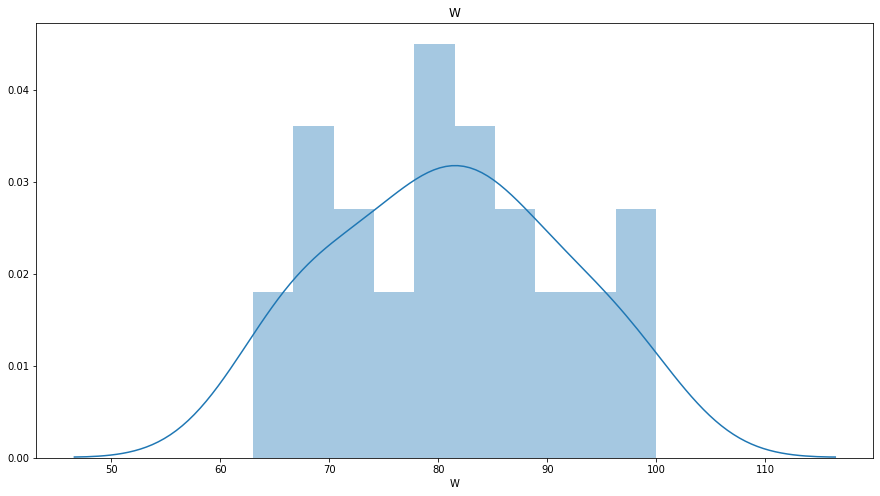

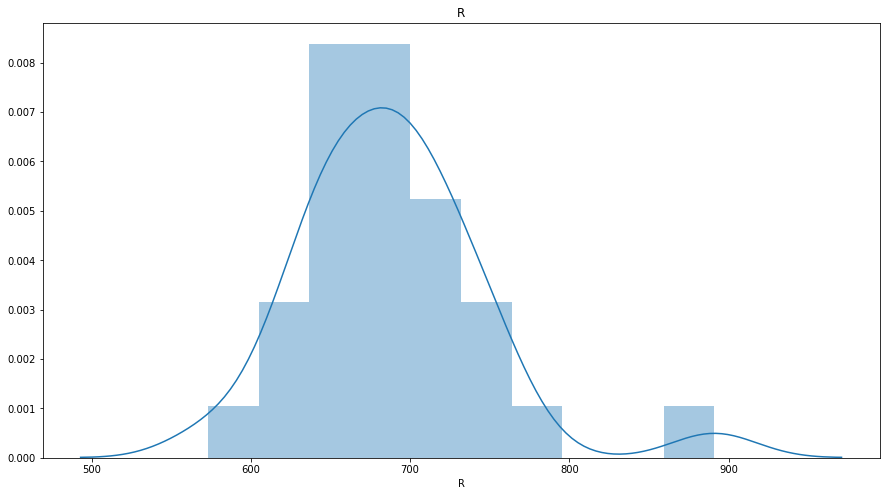

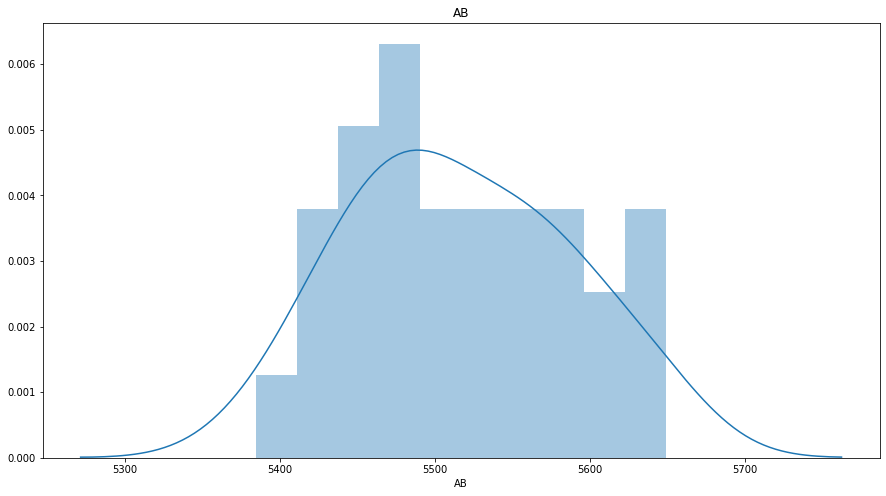

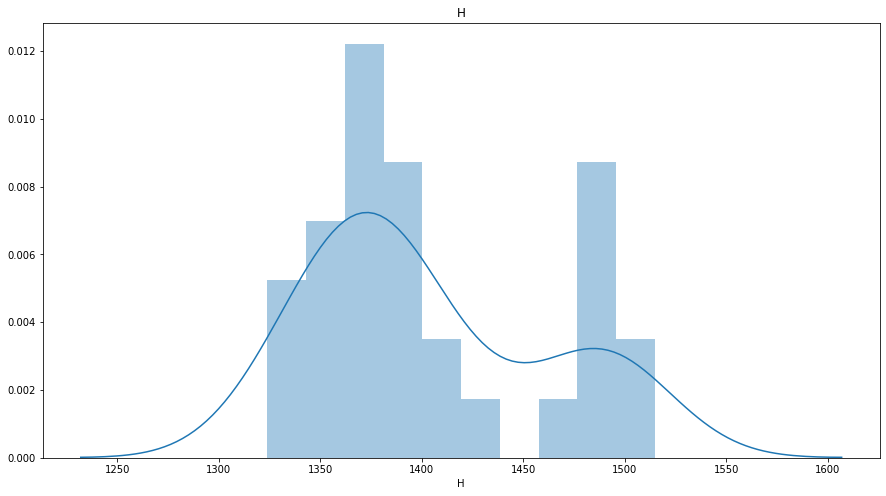

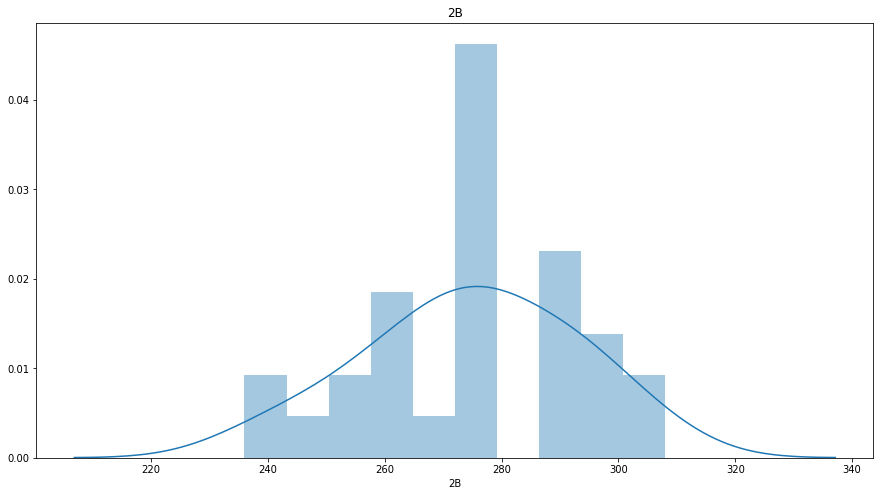

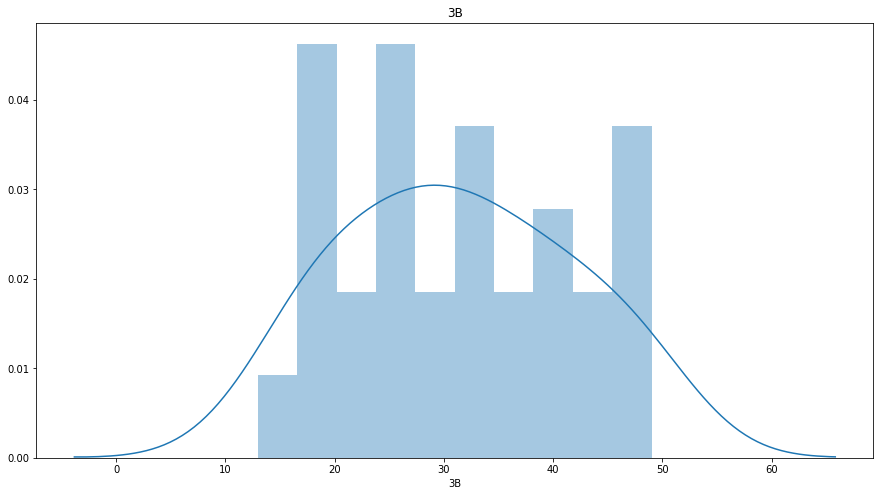

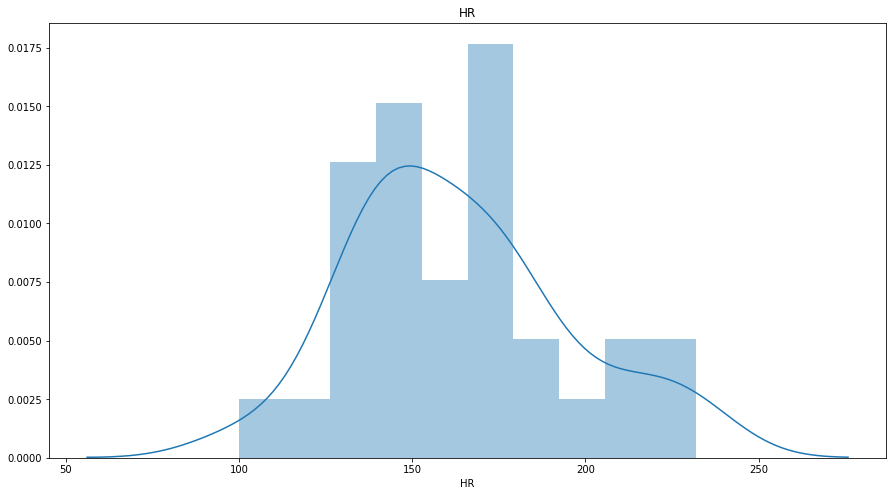

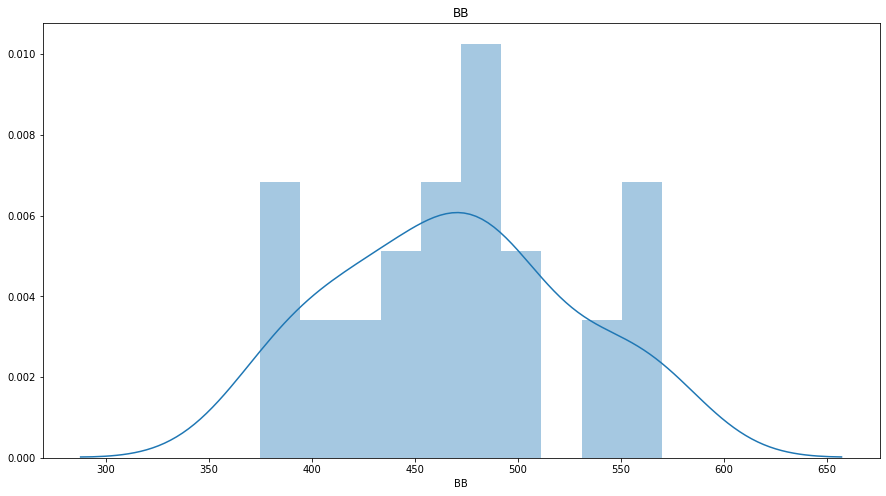

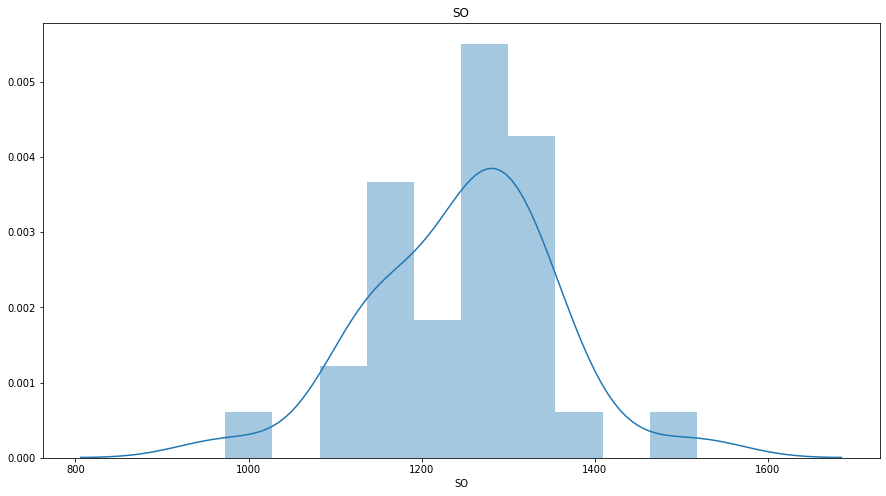

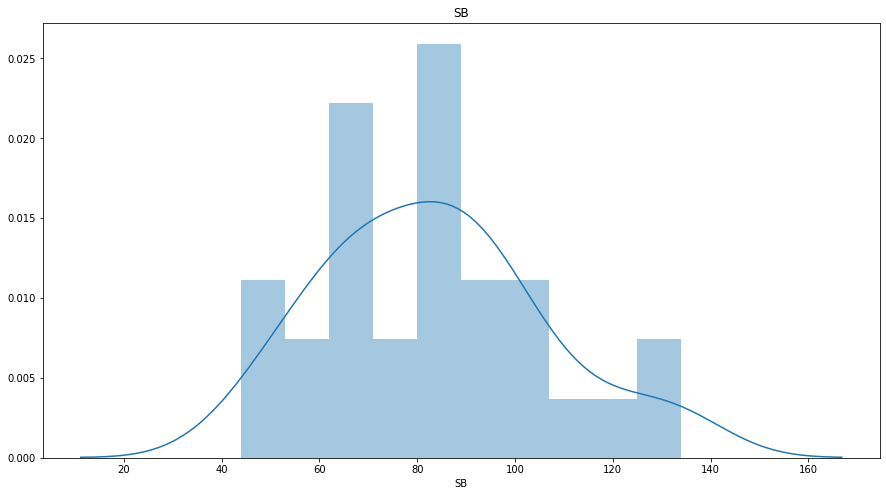

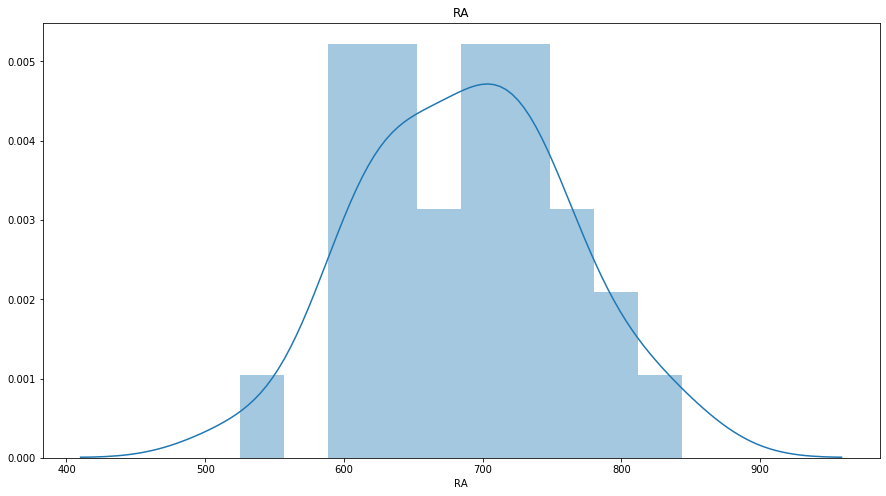

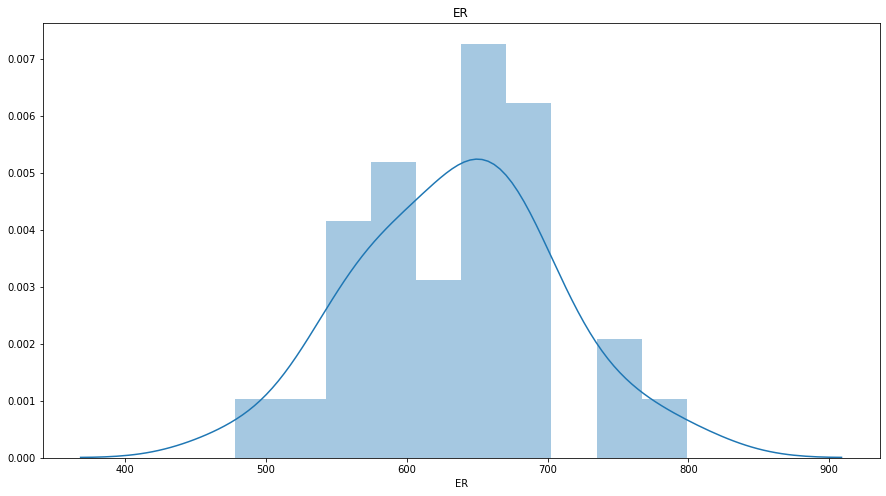

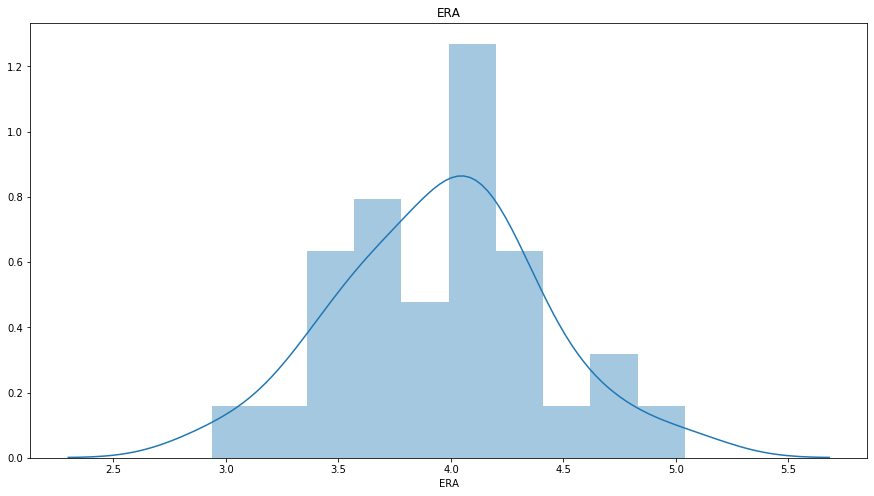

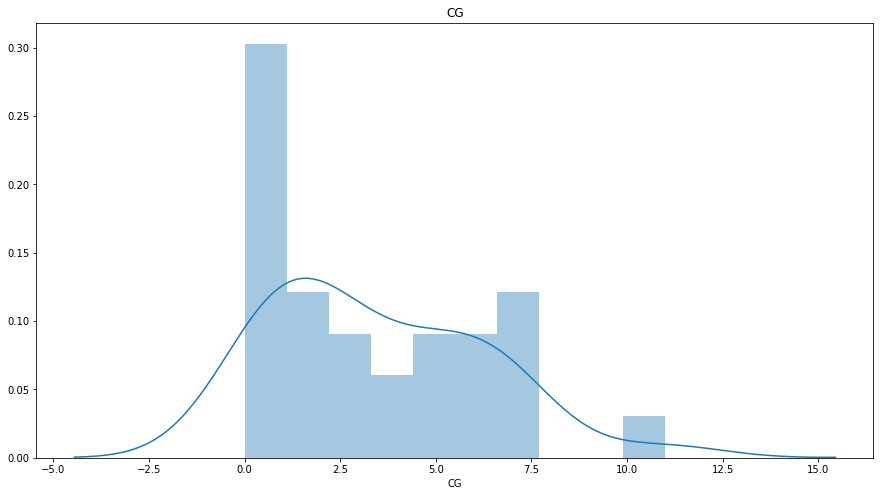

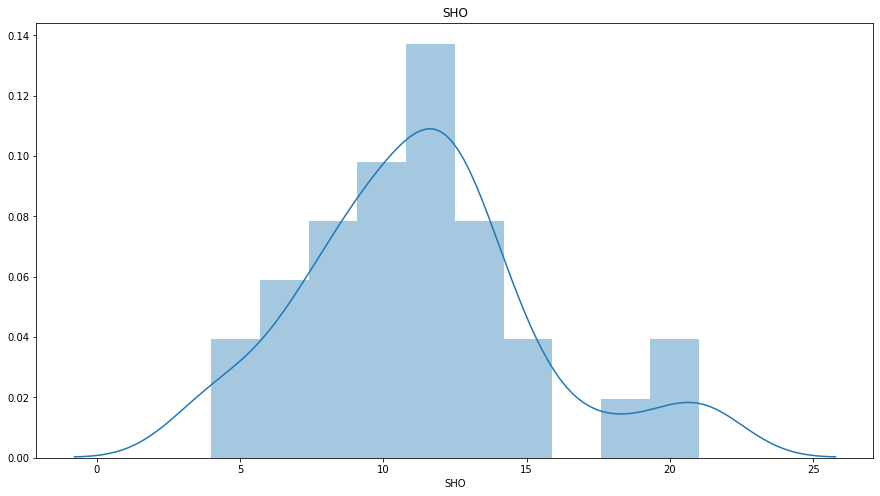

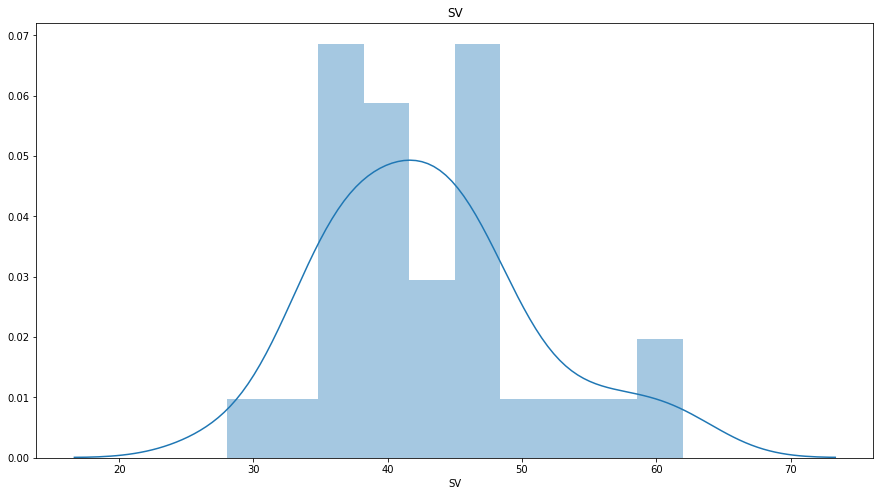

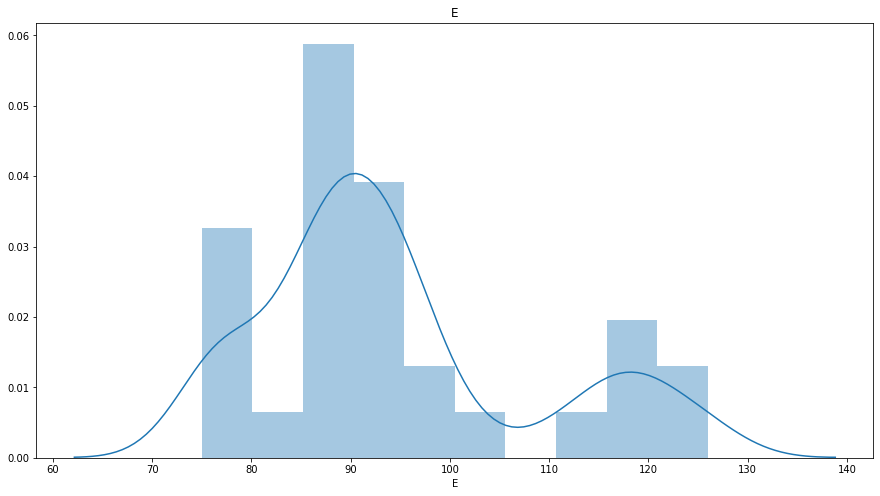

In [10]:
for i in df.columns:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

None of the graphs are perfectly bell shaped and seems to have some sort of skewness in them.

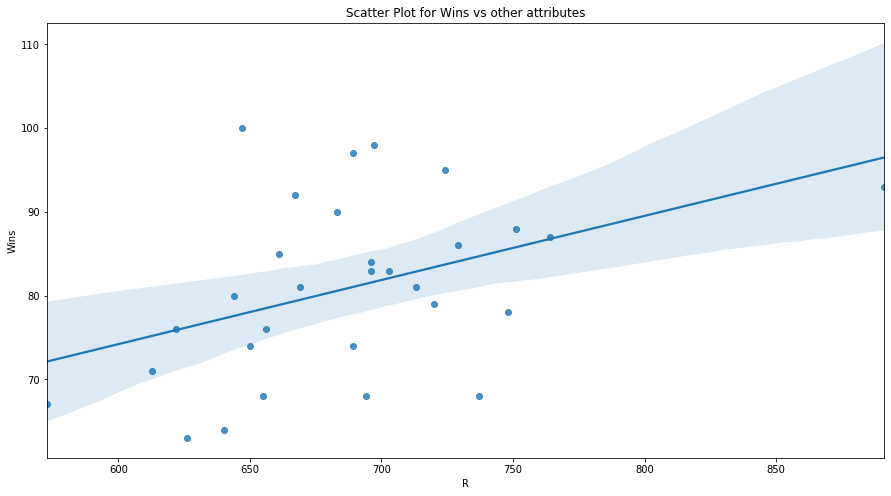

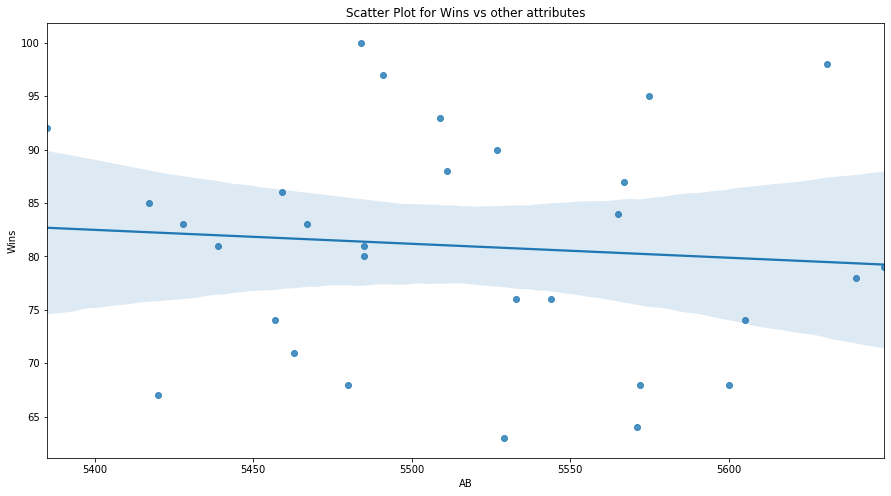

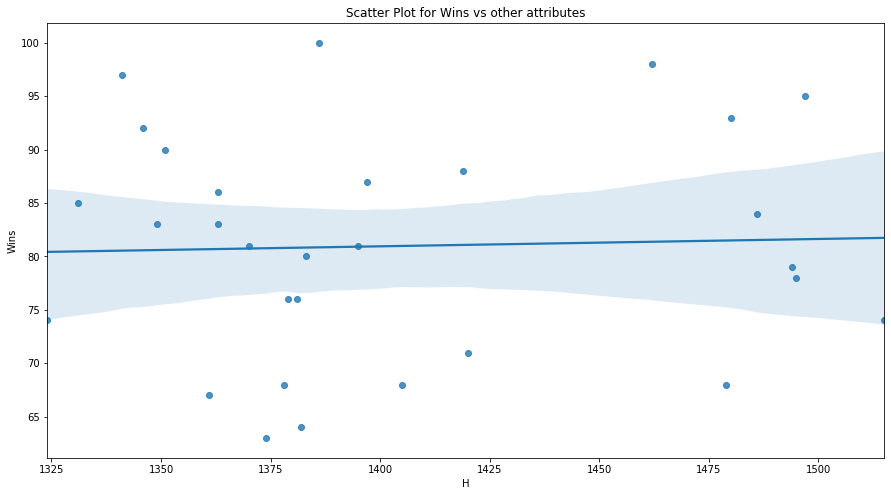

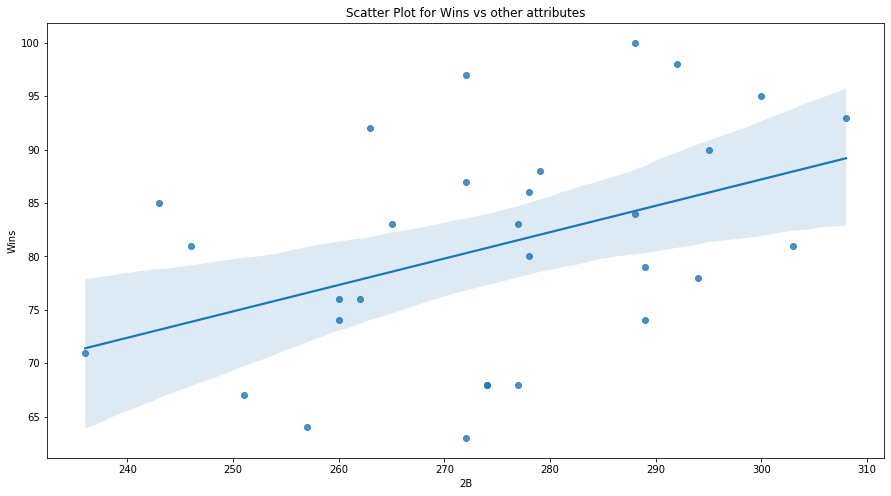

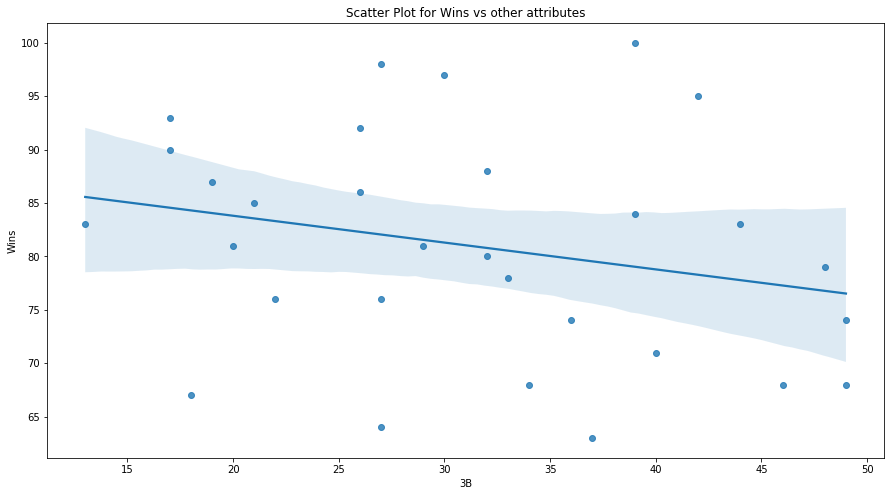

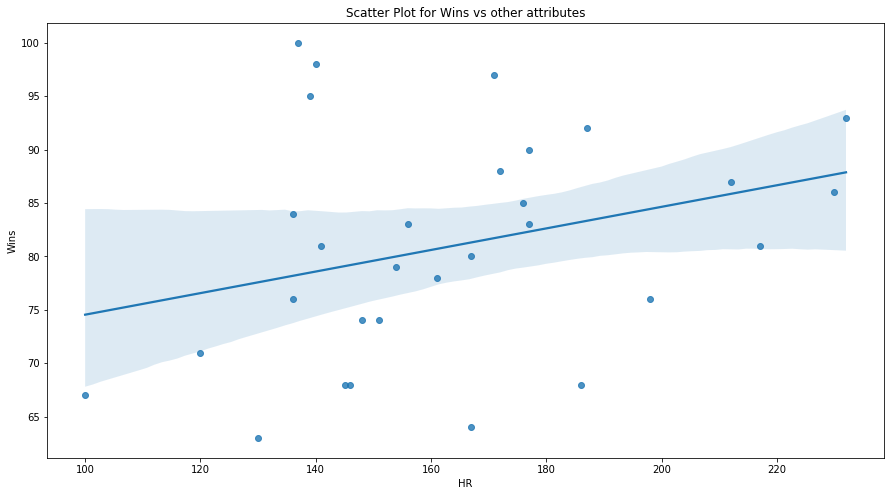

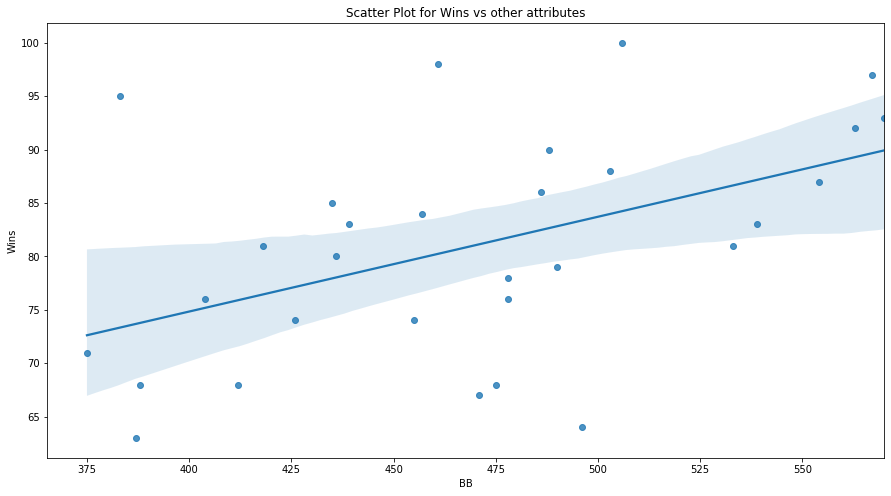

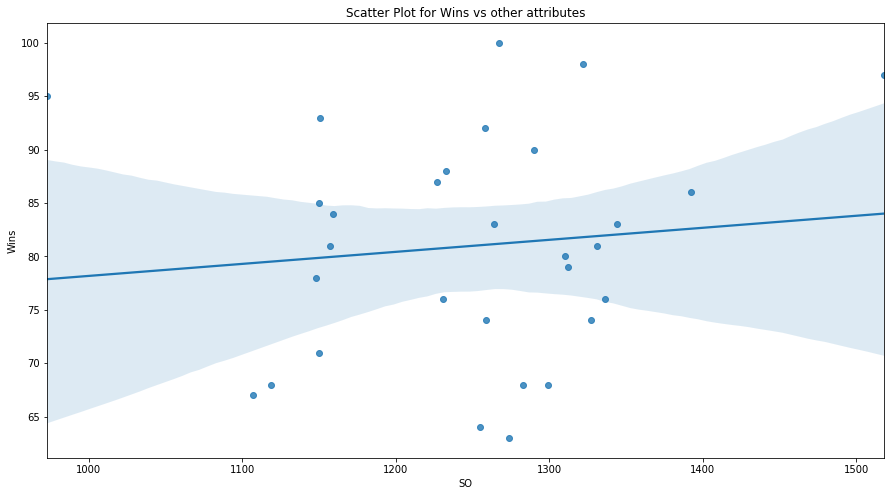

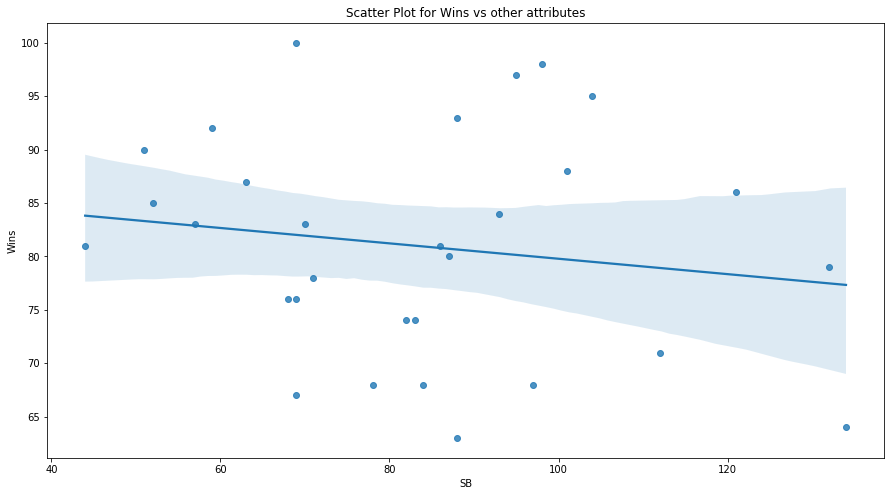

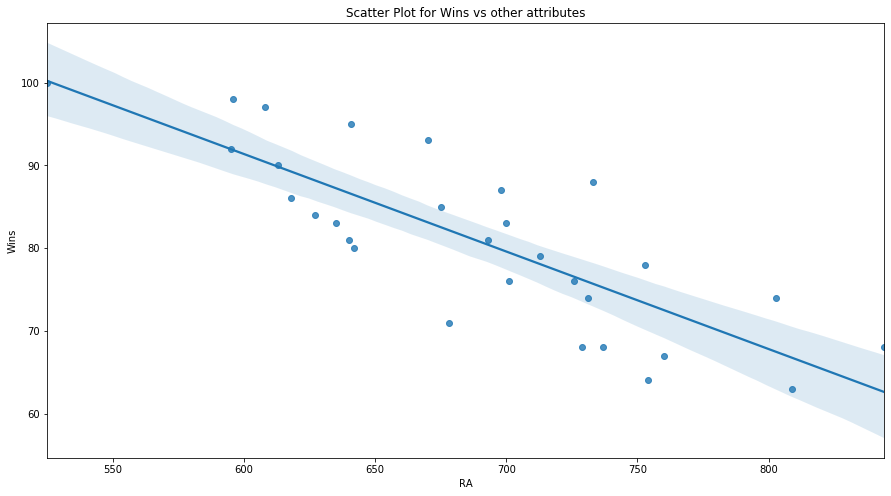

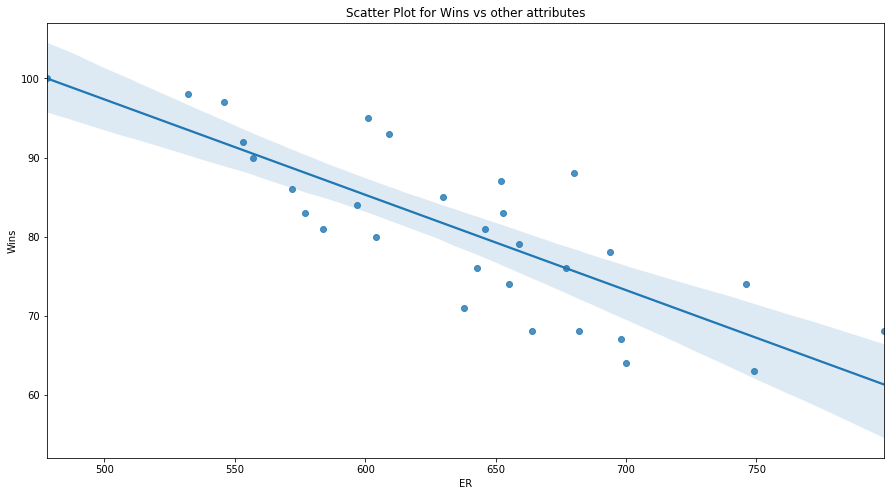

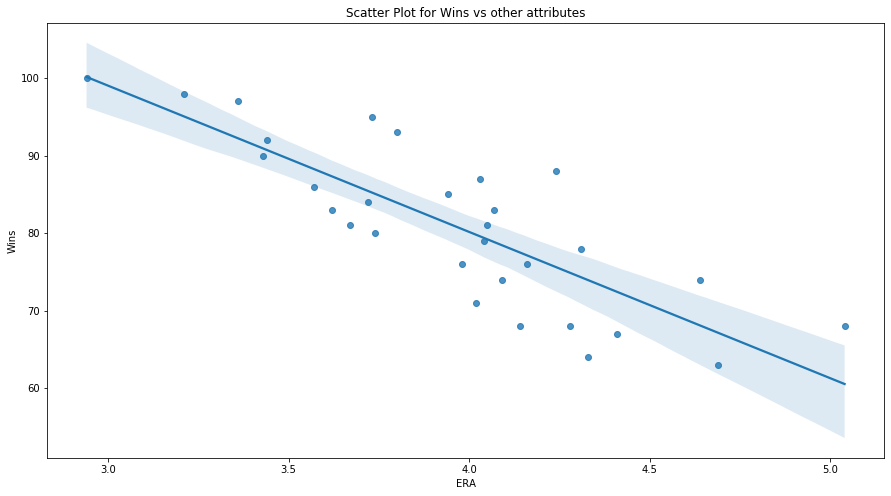

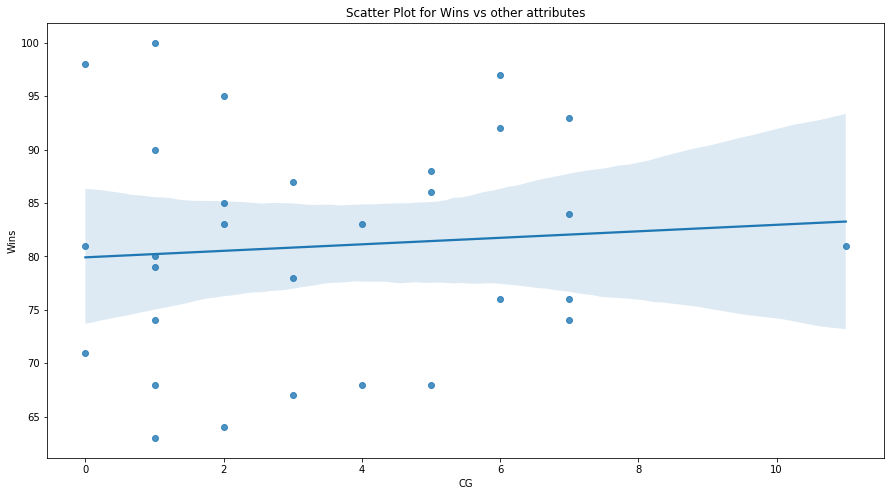

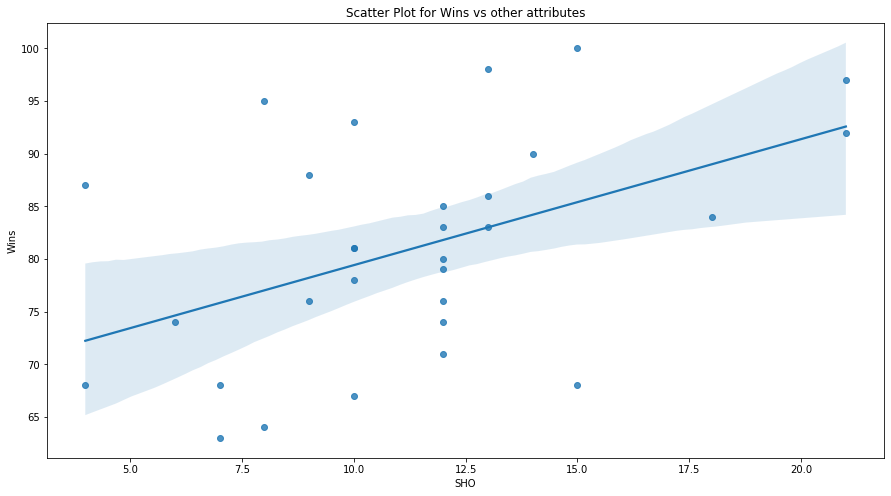

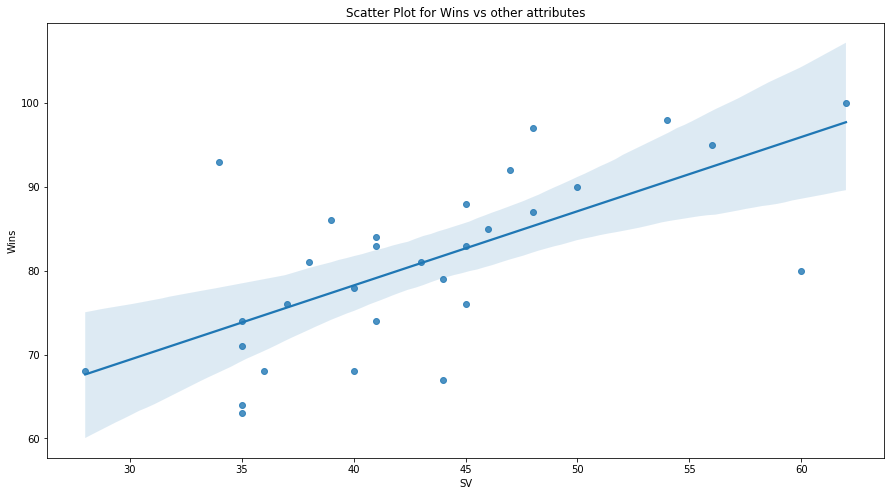

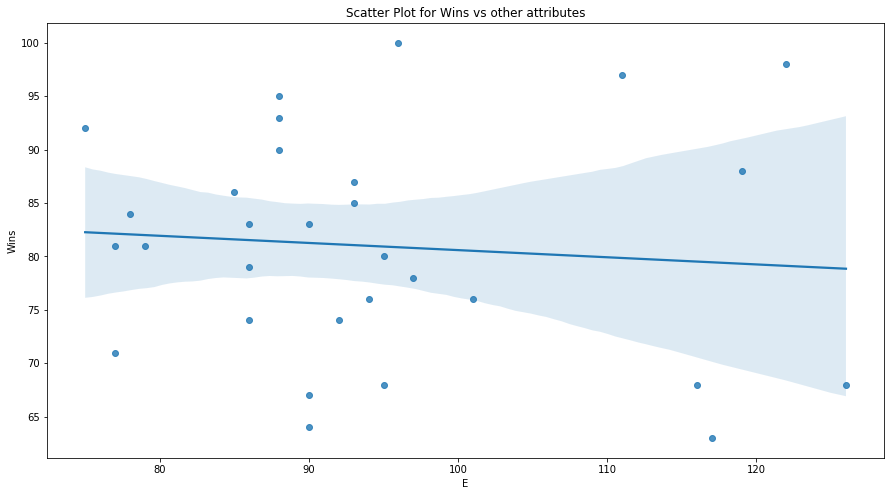

In [11]:
for i in df.columns[1:]:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df[i], df['W'])
    plt.title('Scatter Plot for Wins vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Wins')
    plt.show()

RA, ER, ERA showed strong inverse relationship with W.

R, 2B, HR, BB, SHO, SV, showed positive linear relation with W but with a small slope.

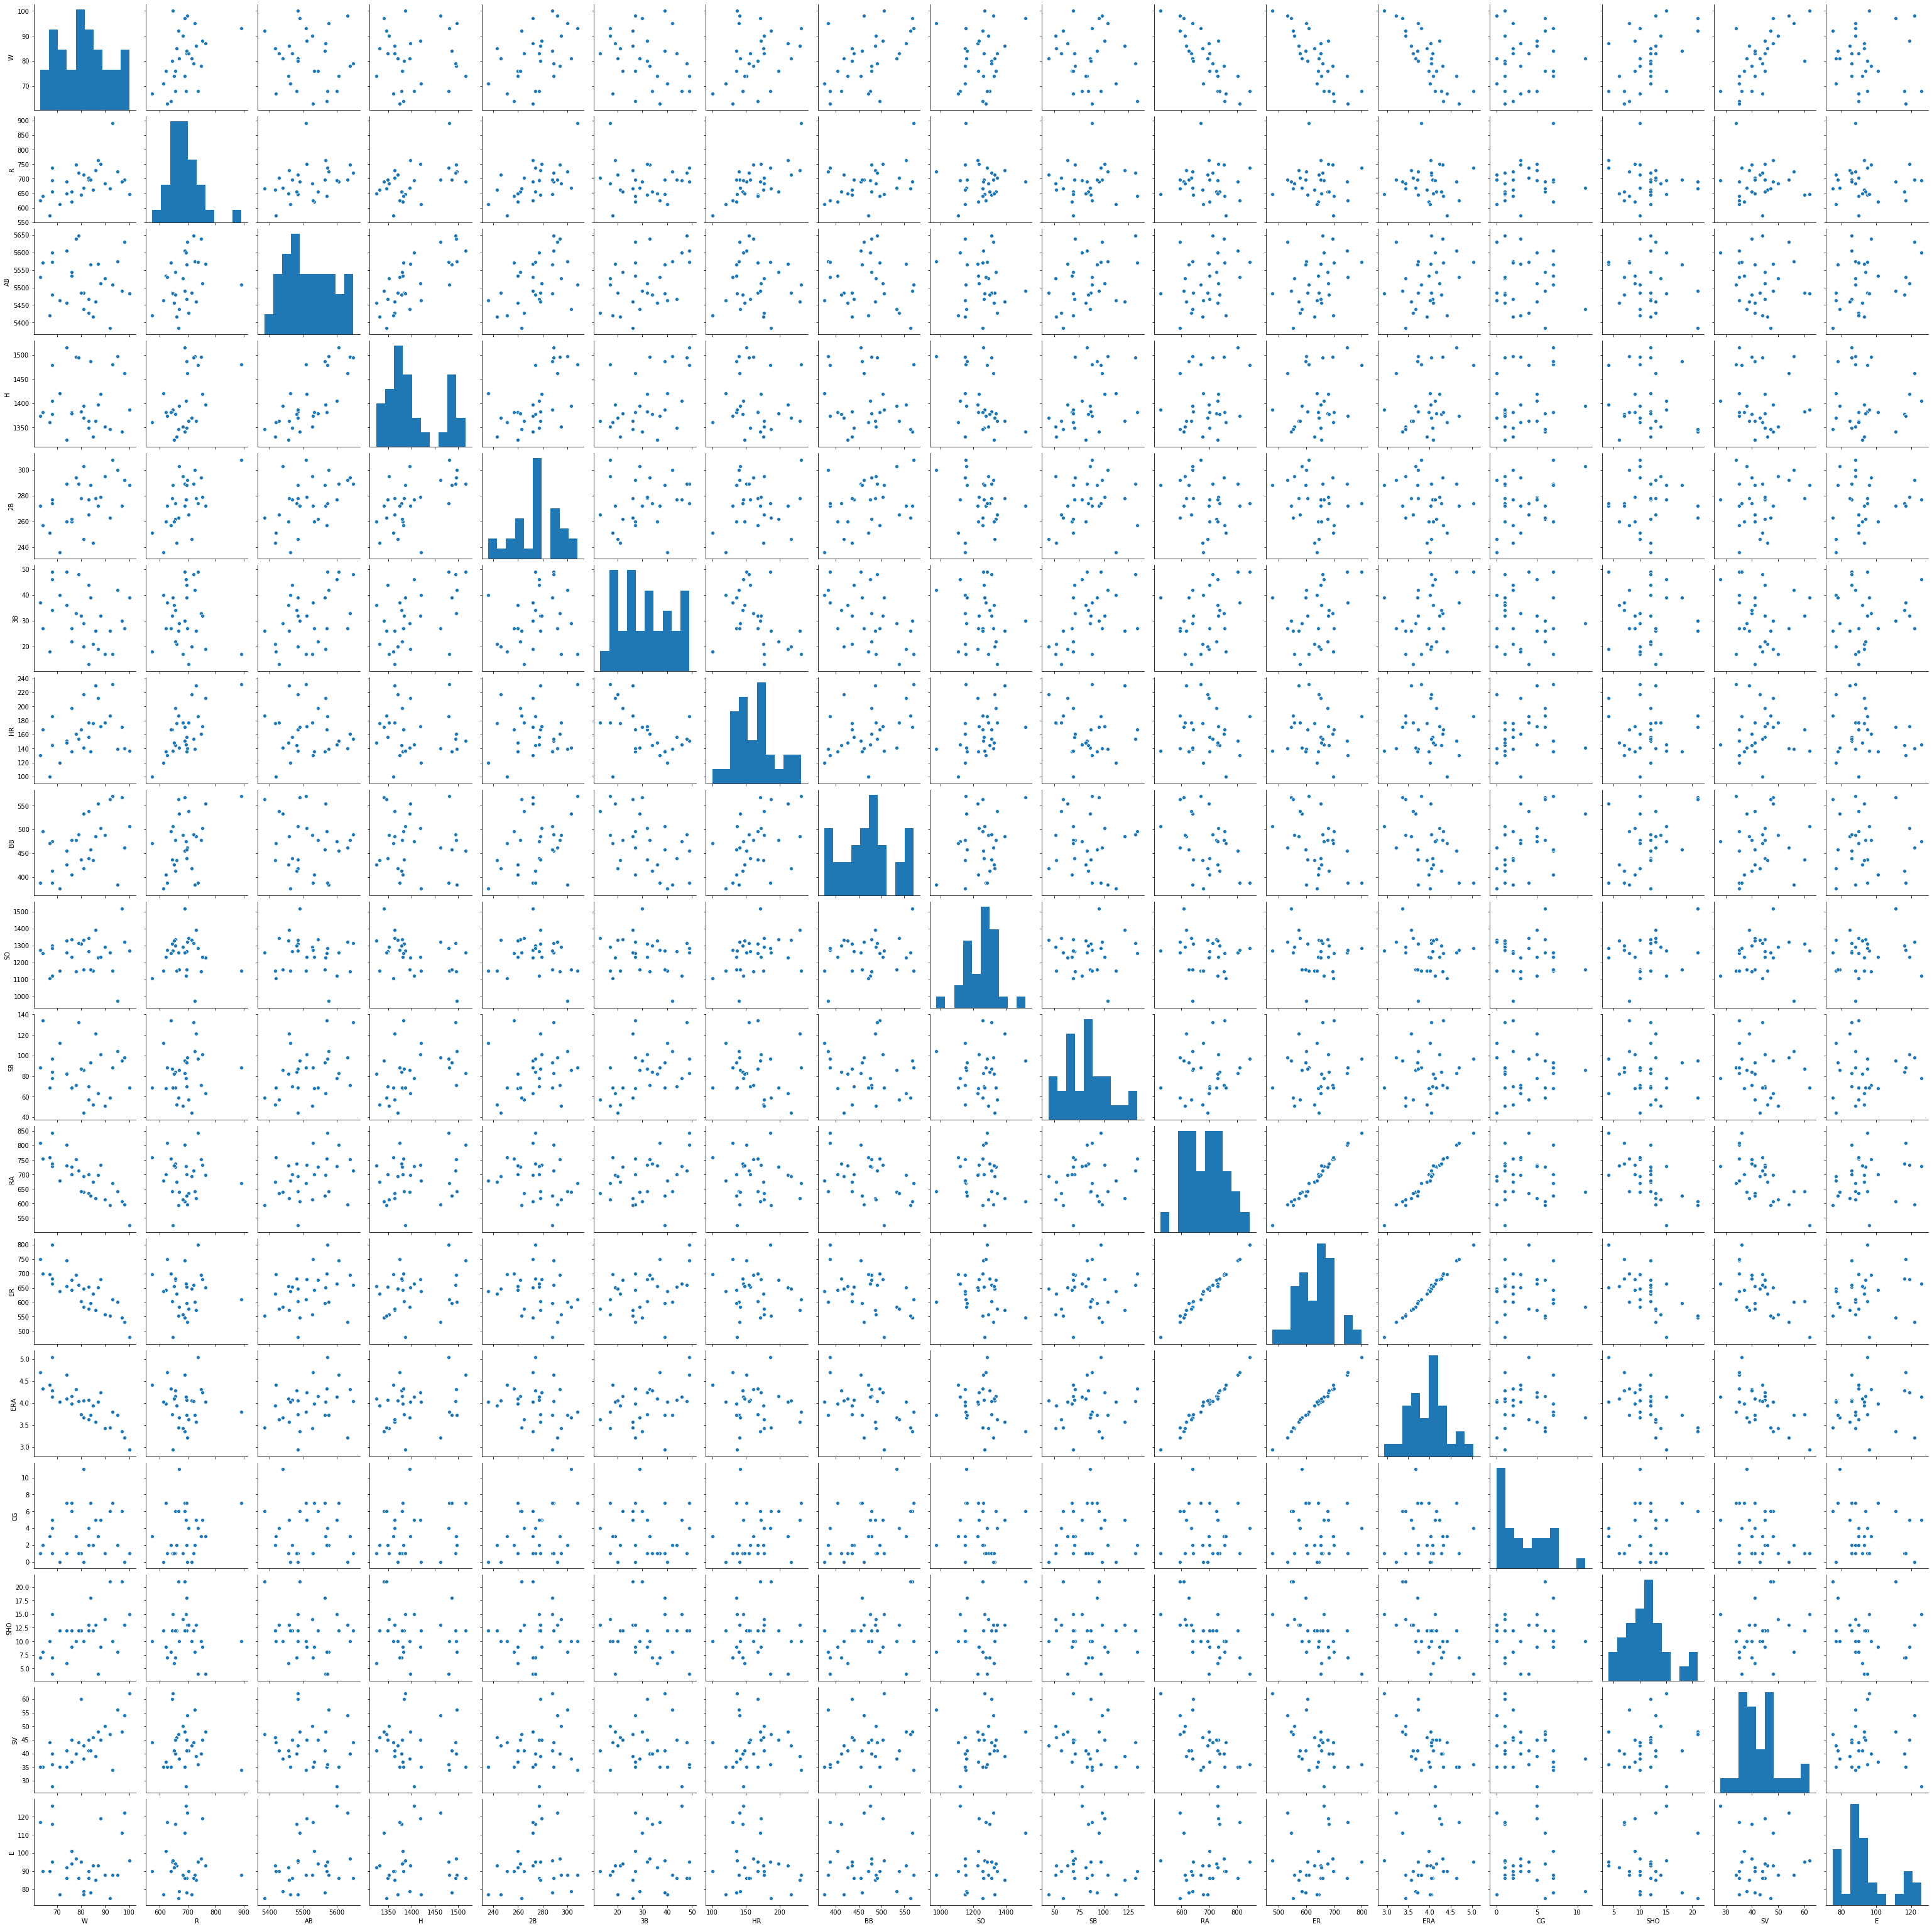

In [12]:
sns.pairplot(df)                             #multivariate analysis

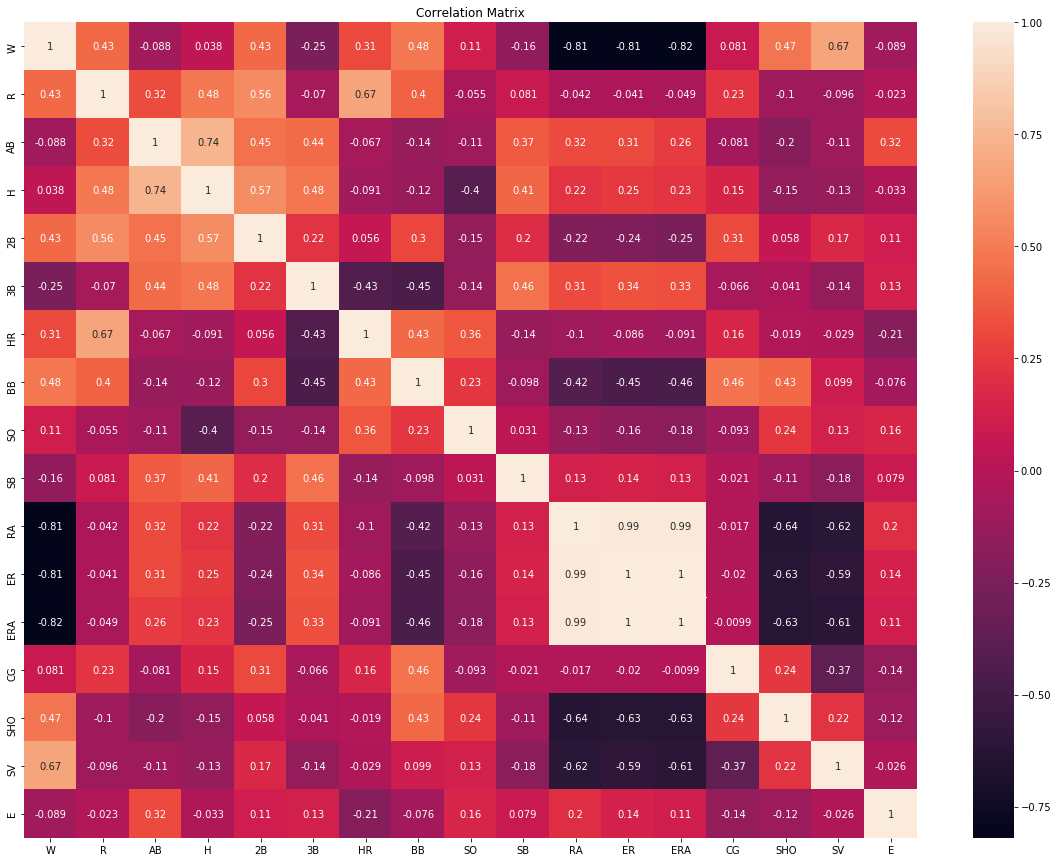

In [13]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

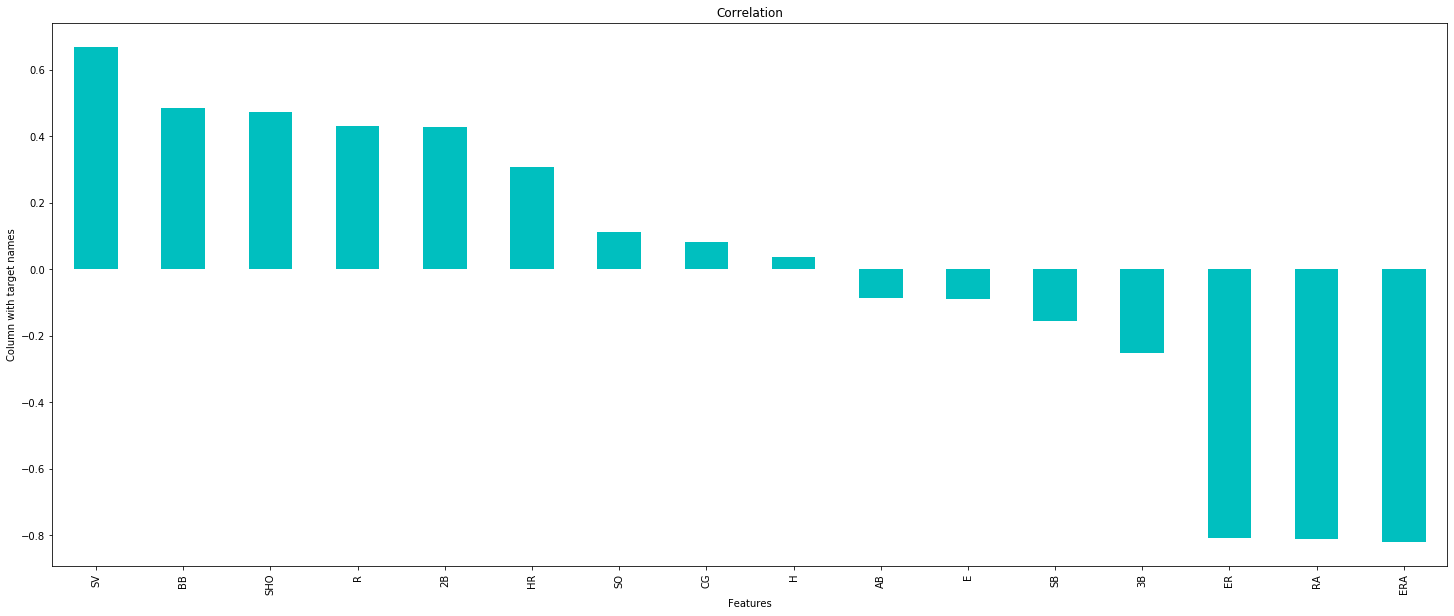

In [14]:
plt.figure(figsize = (25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

As we can see from the correlation matrix and the graph, ER, RA, ERA have the strongest correlation with wins but in negative nature.

In positive side SV has the highest correlation of 0.67 followed by BB, SHO, R, 2B all above 0.4.

Even though ER, RA and ERA are very negatively correlated with wins but they showed highest correlation amongst themselves of over 0.99.

# Outliers and Skewness

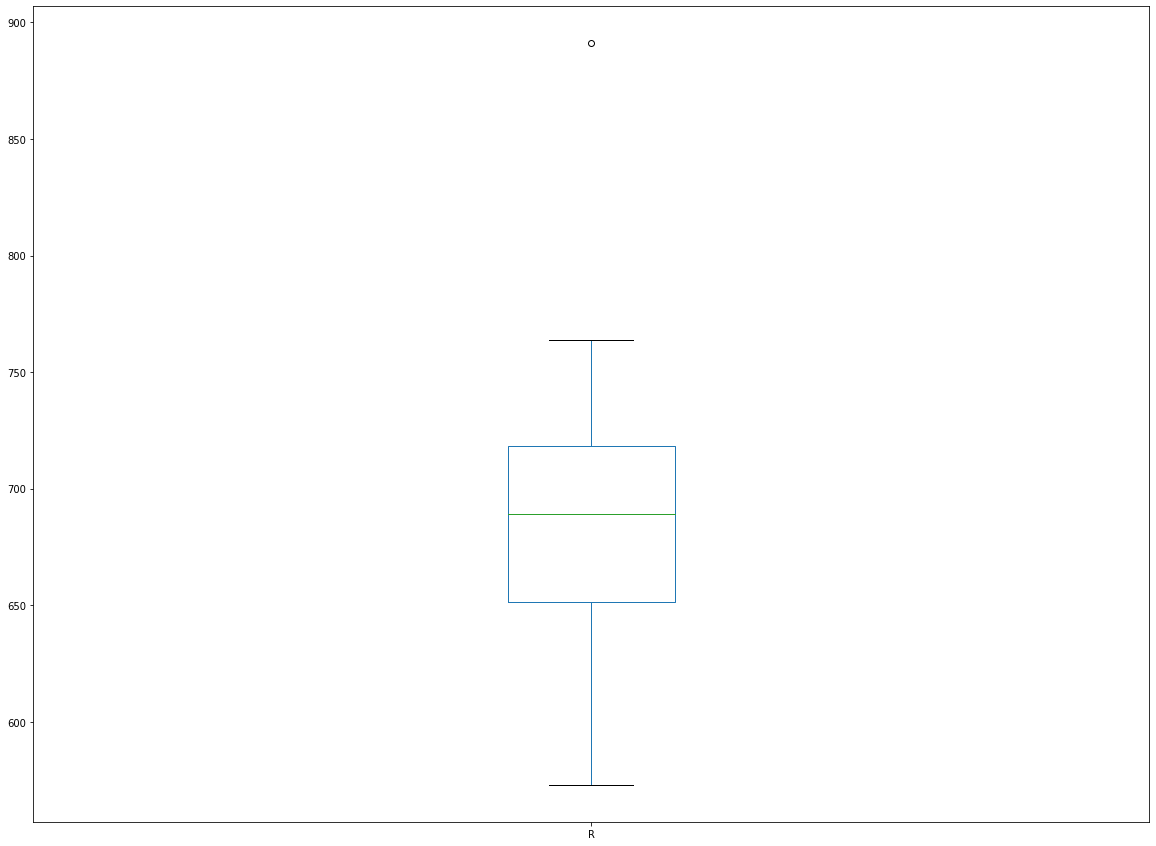

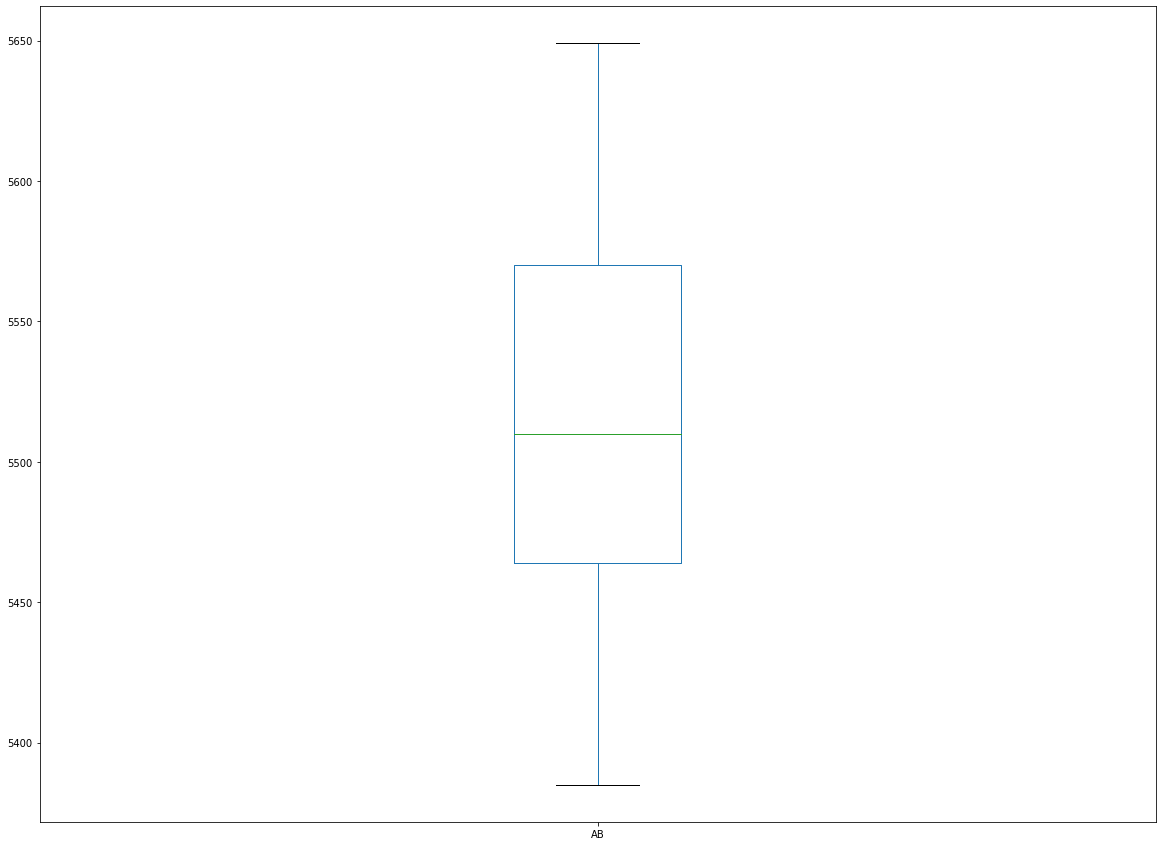

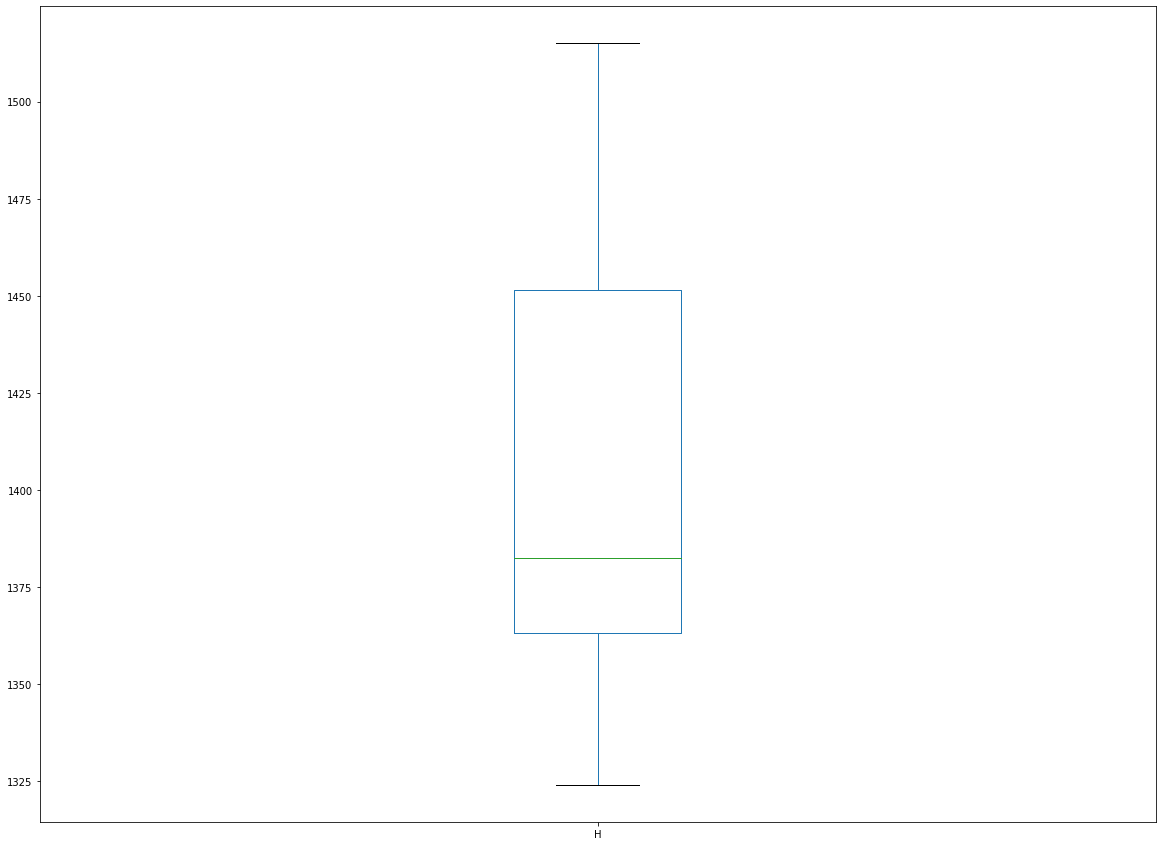

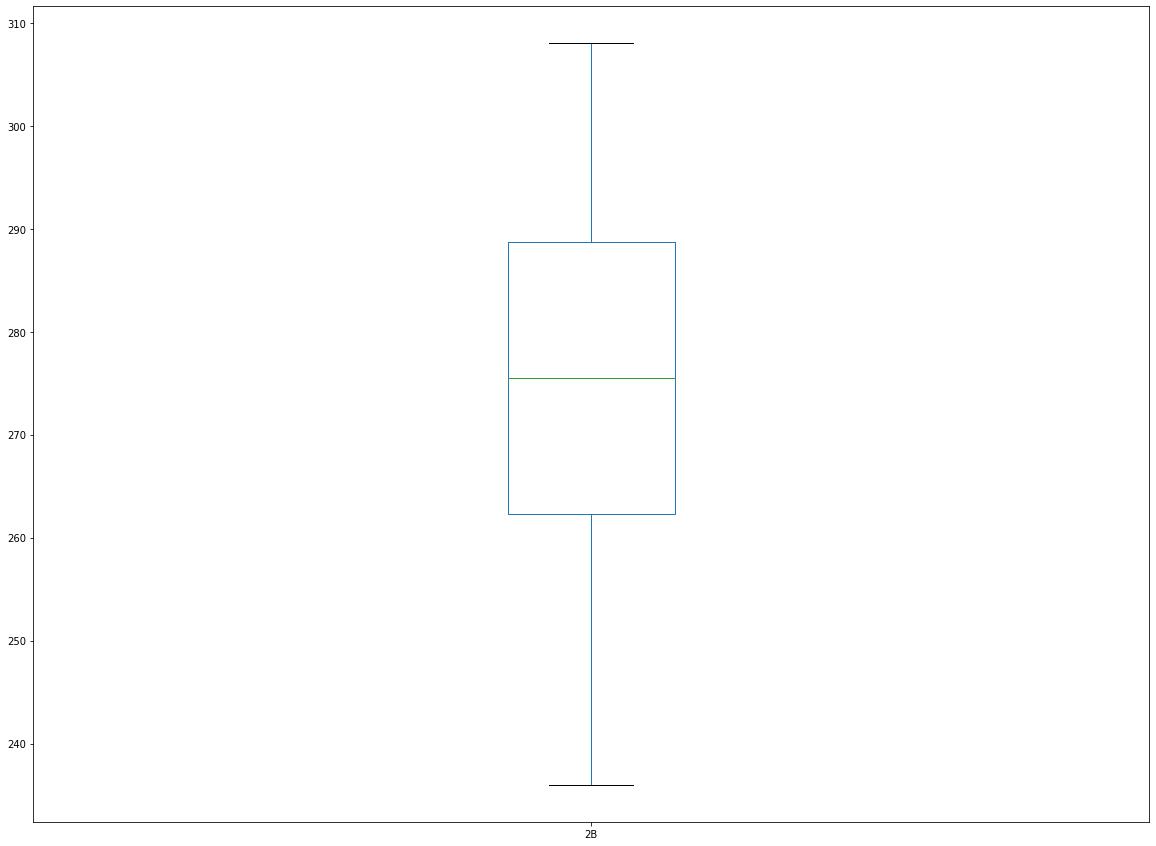

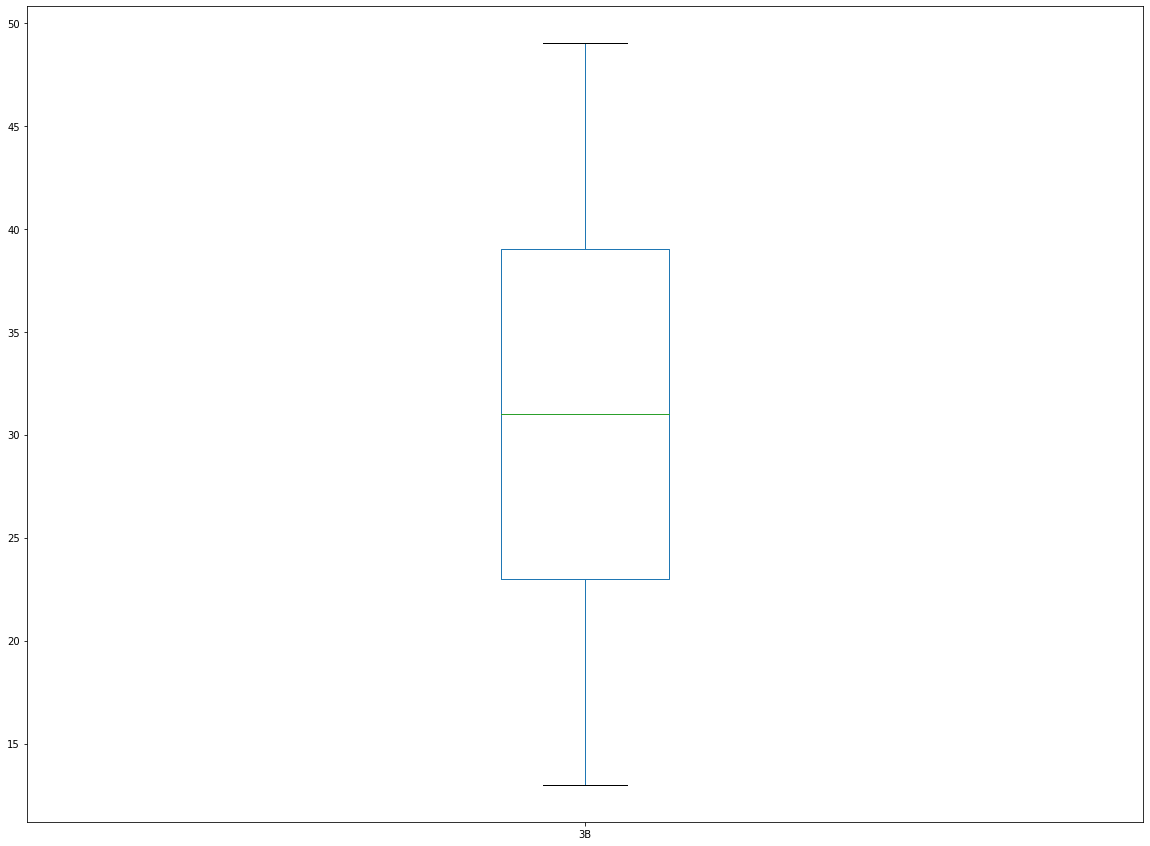

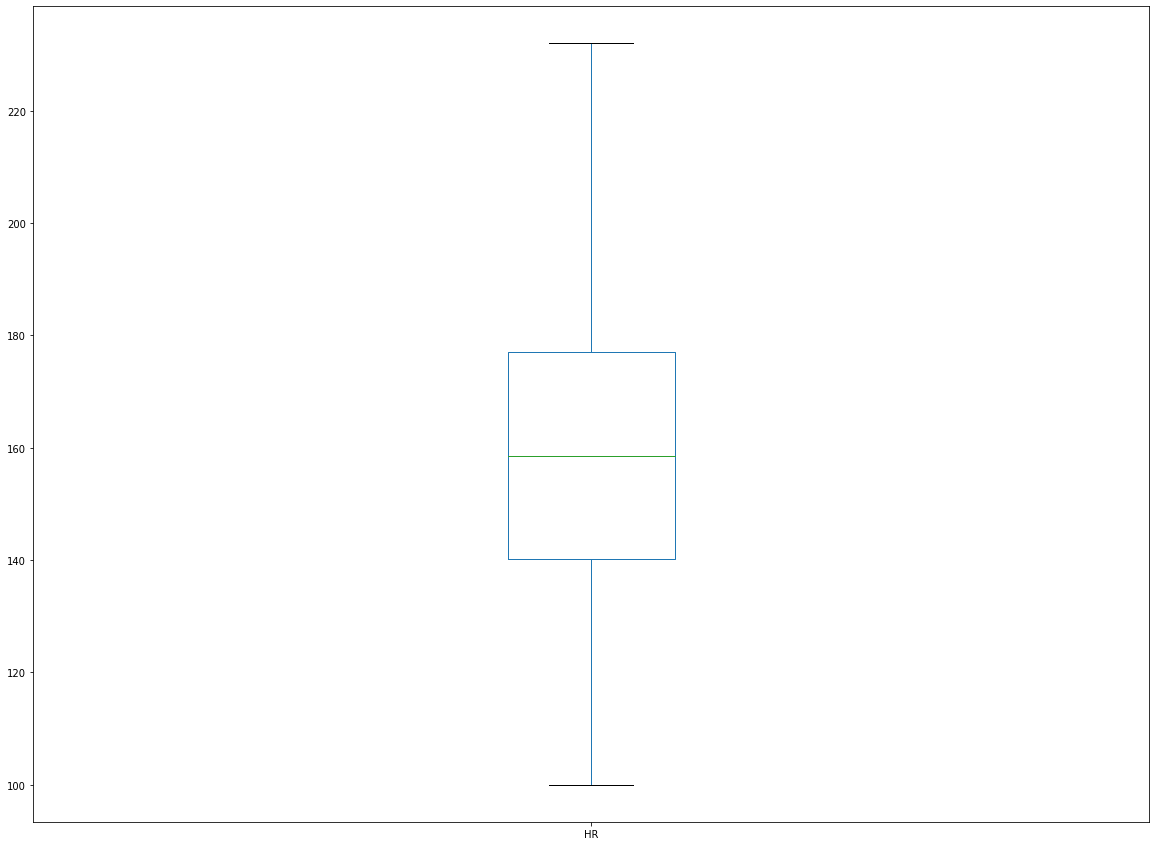

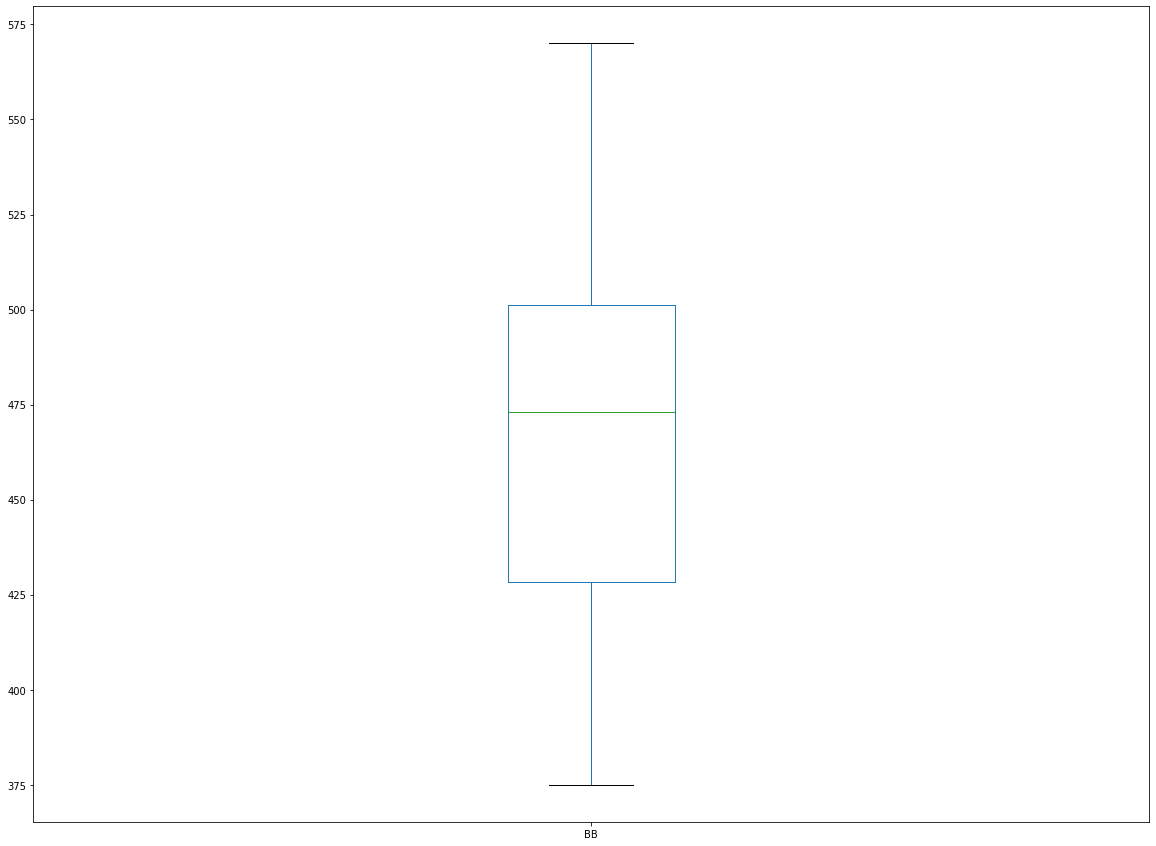

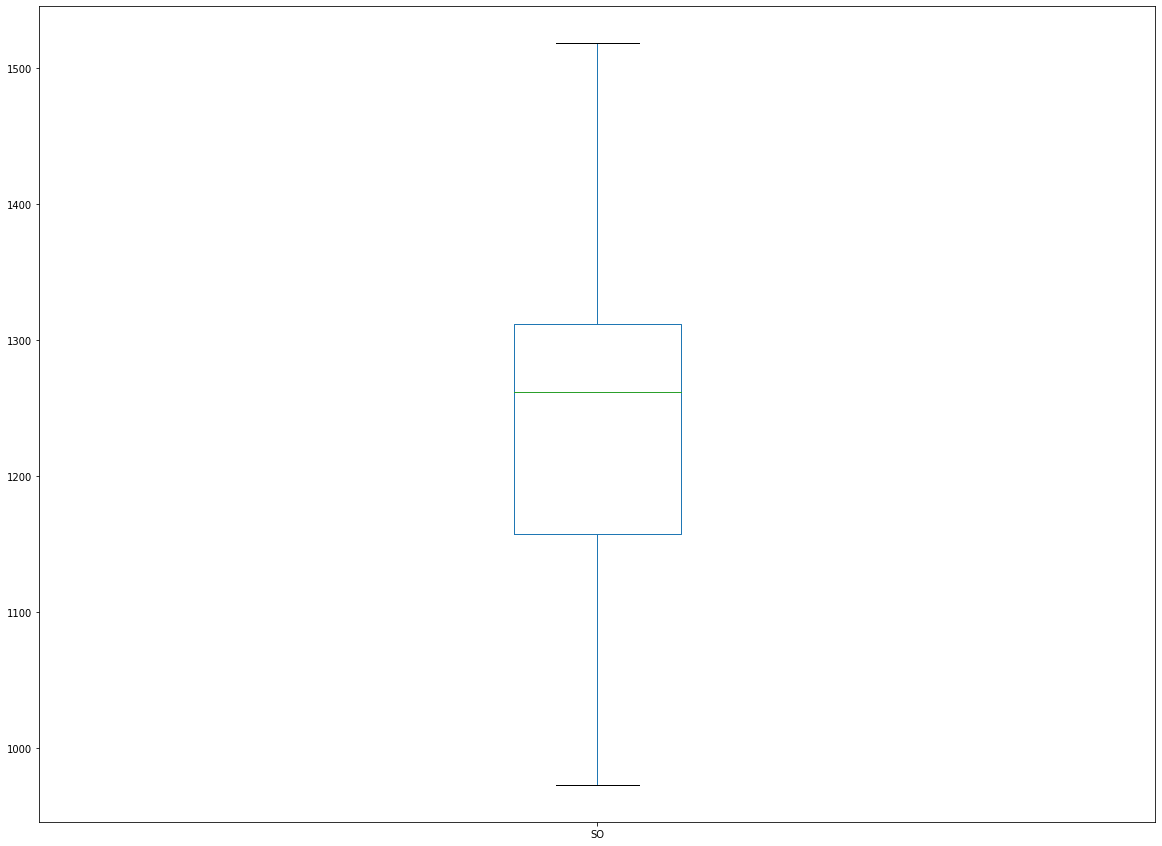

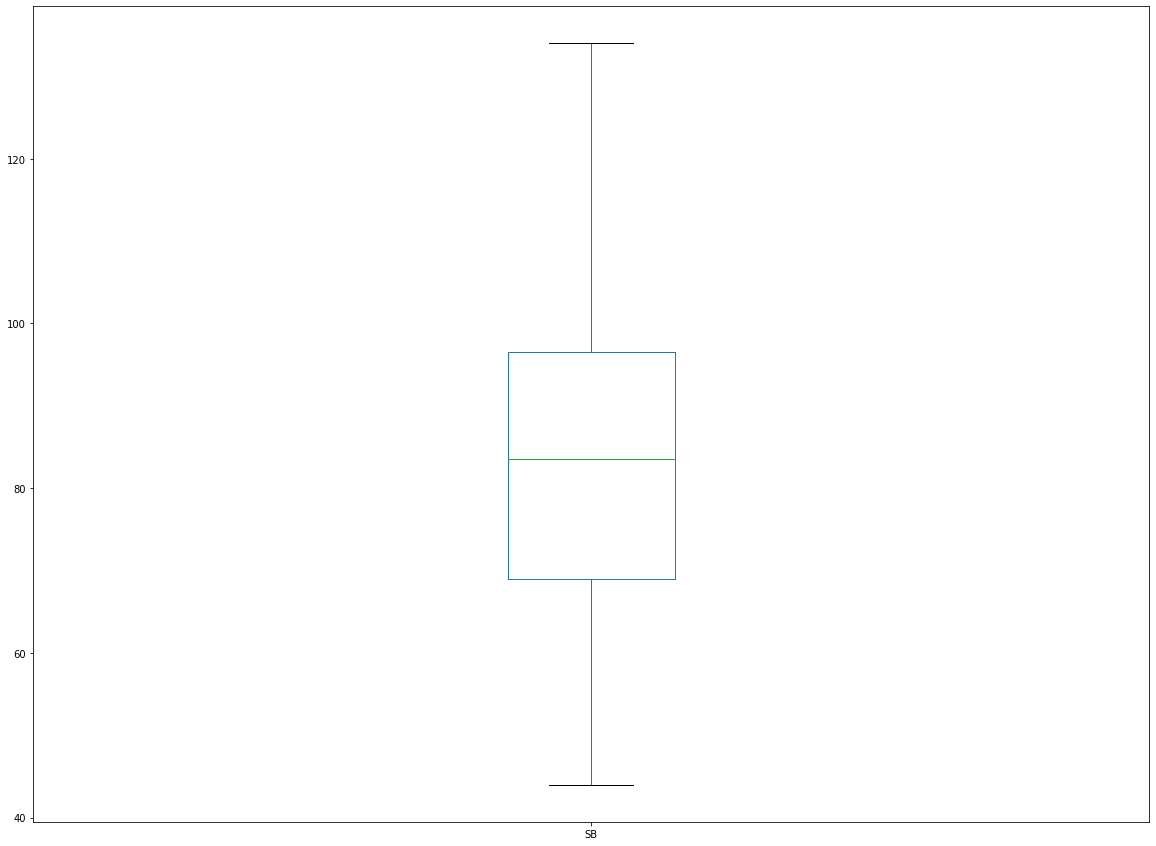

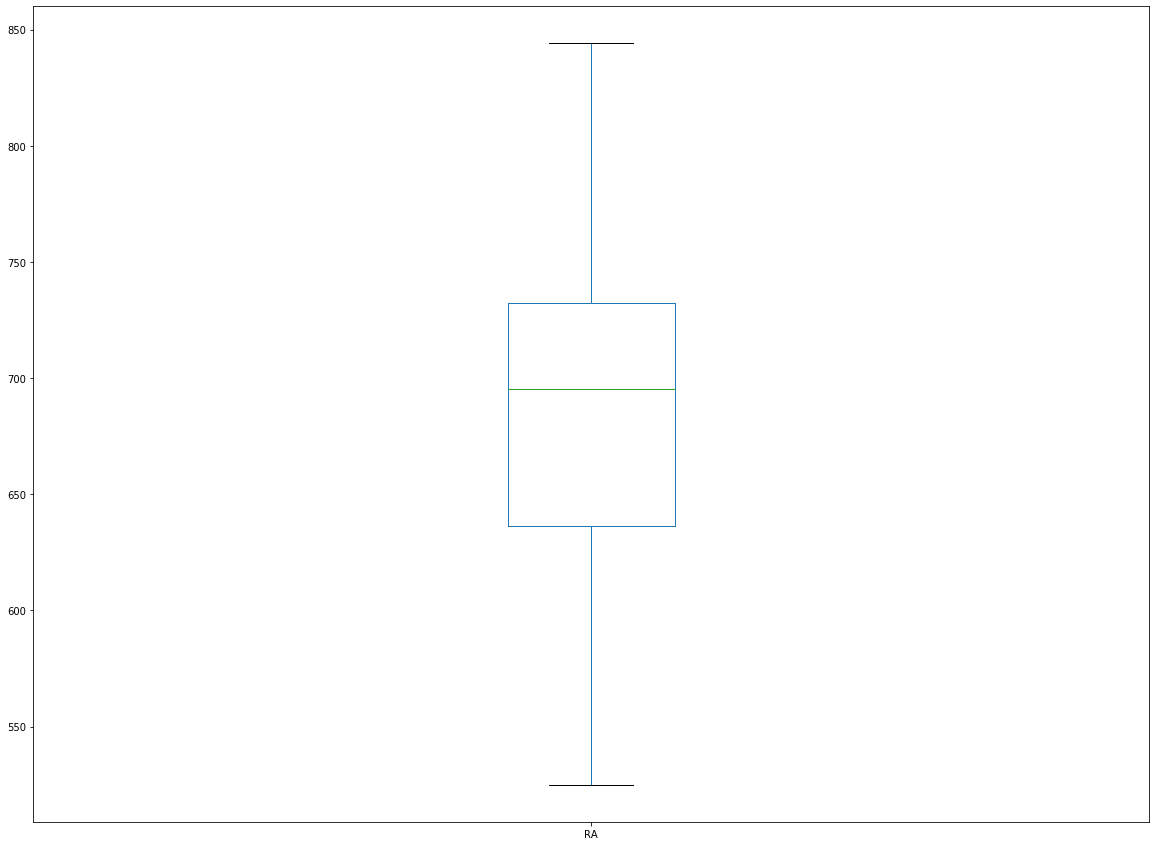

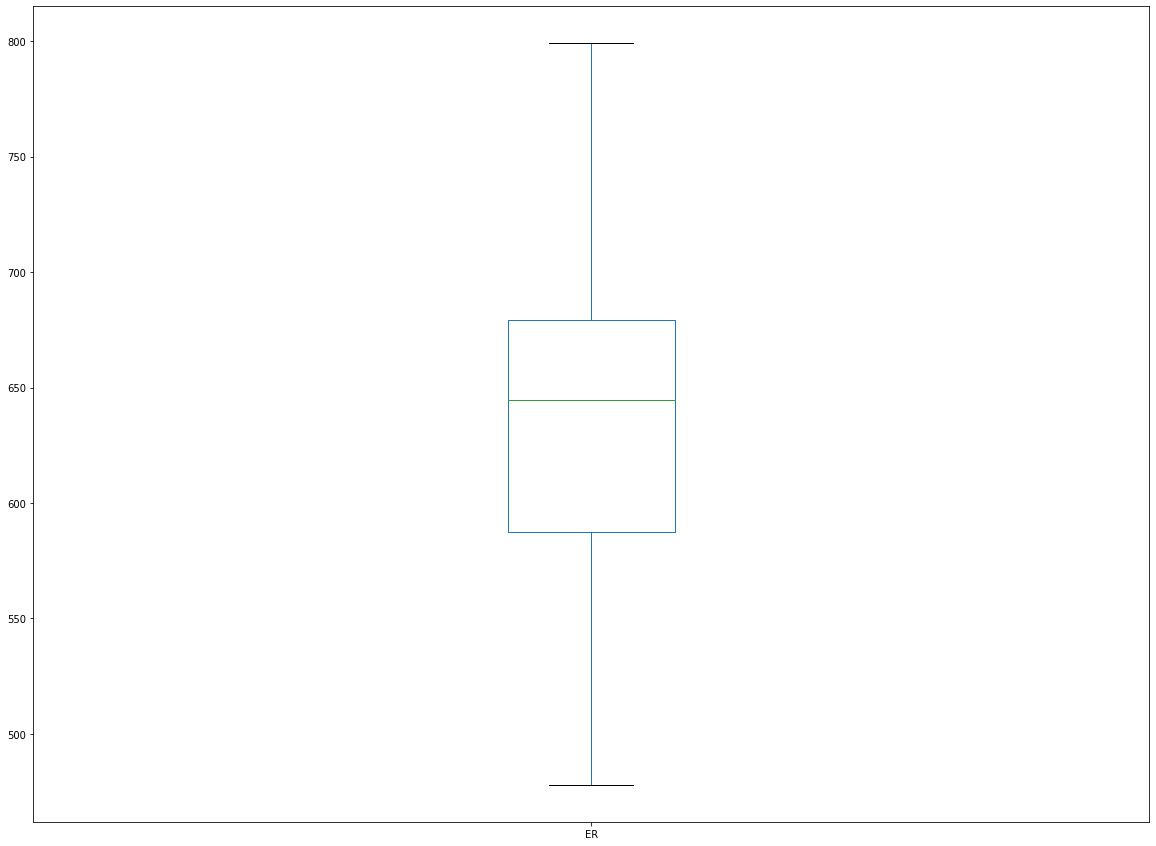

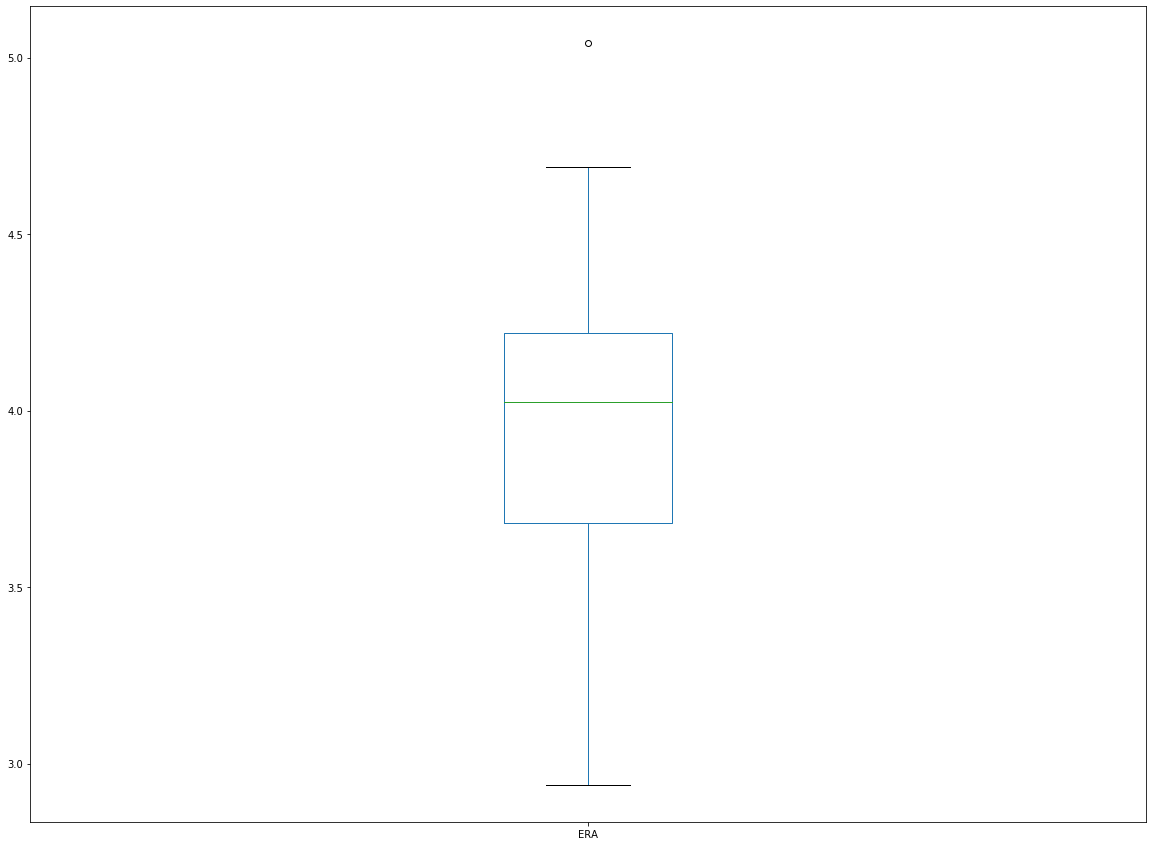

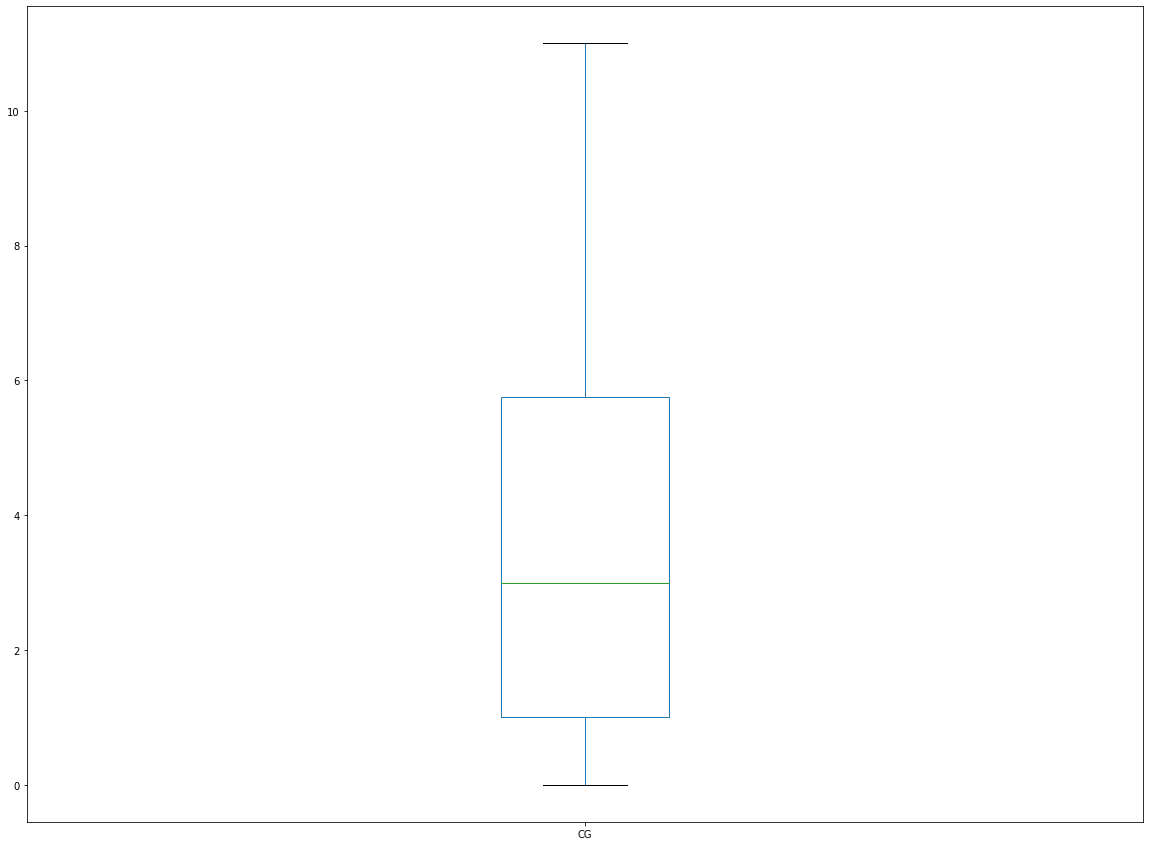

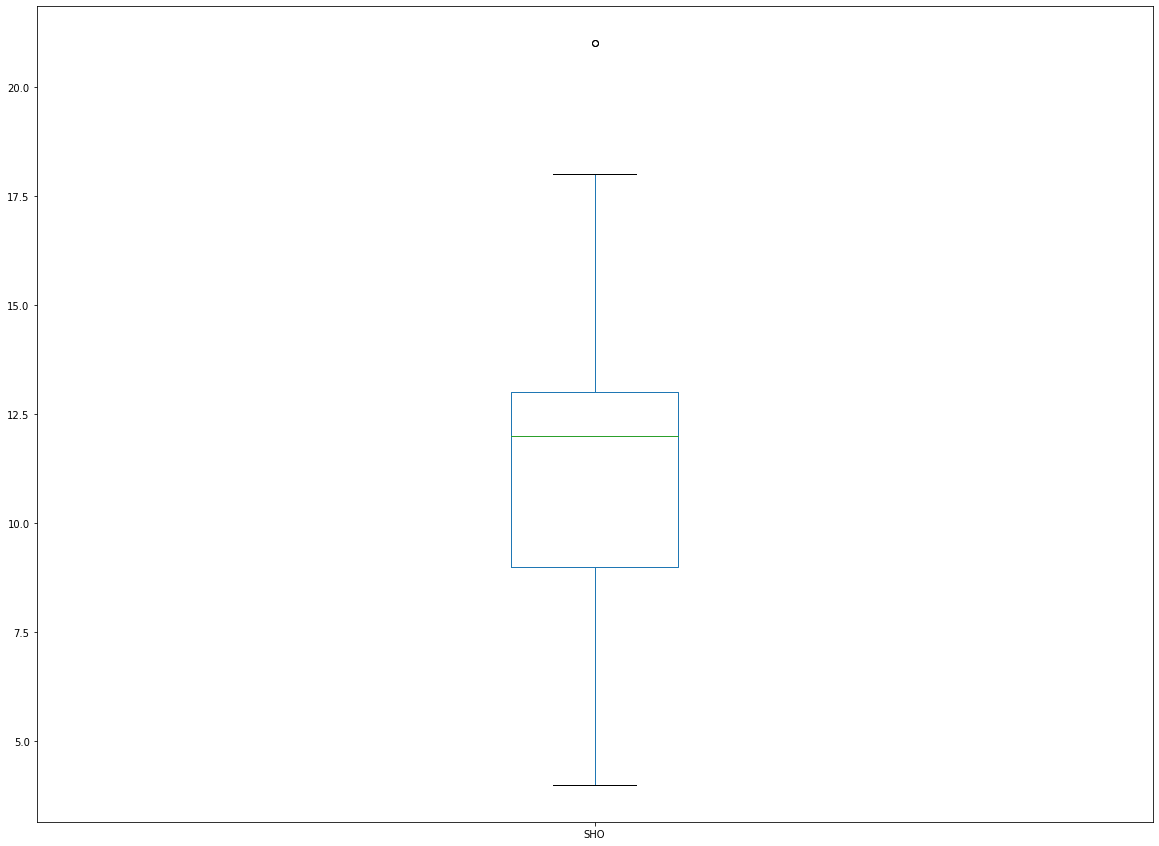

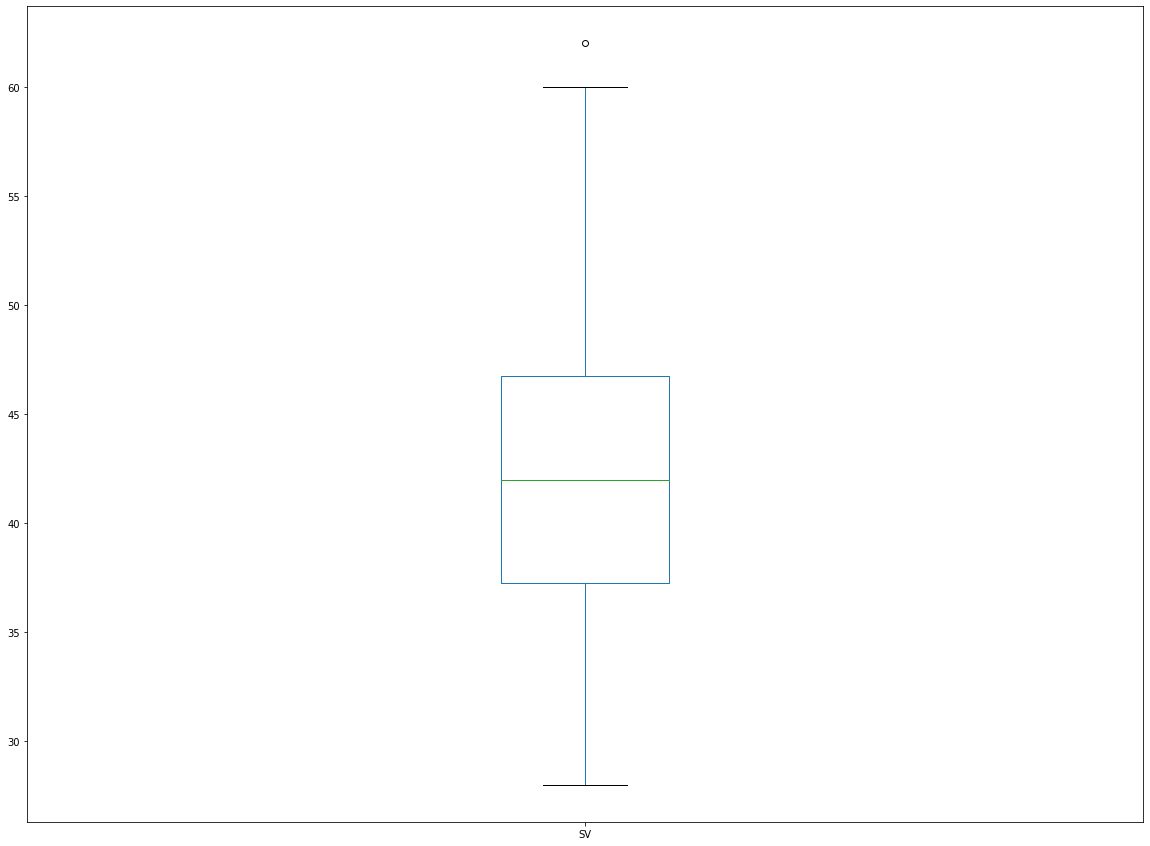

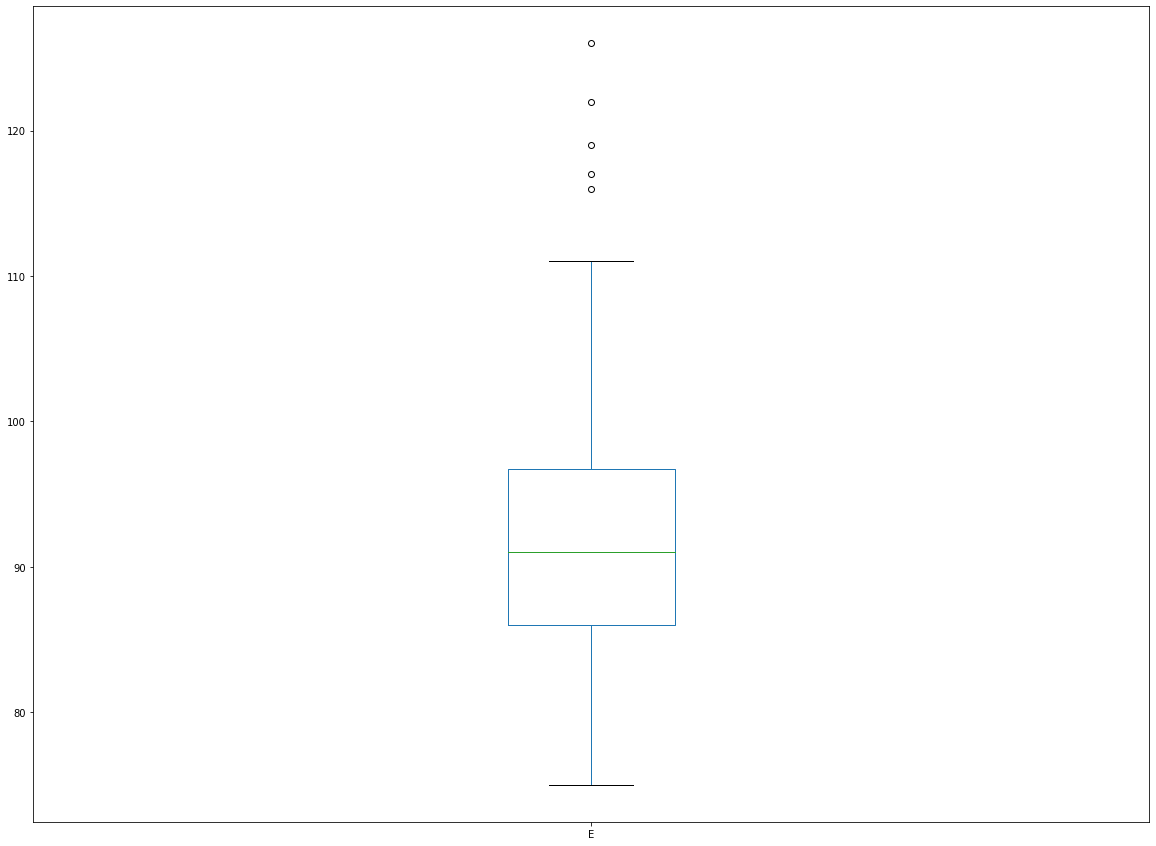

In [15]:
for i in df.columns[1:]:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

The dataset seems to be very clean with very few or no outliers present in it. Since the dataset is very small it will be better not to get rid of any data.

In [16]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

R, H, CG, SHO, SV, E all seems to have skewness higher than the threshold value of +-0.5, we need to treat the skewness present in the data.

In [17]:
x = df.drop('W', axis = 1)
y = df['W']

In [18]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new = power_transform(x, method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = x.columns)              

In [19]:
x = df_new

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

# Best Random State

In [21]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.8968607986529764 on Random State 350


# Creating Train Test Split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 350)

In [23]:
LR = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [LR, dt, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (r2_score(y_test, pred))
    print (mean_squared_error(y_test, pred))
    print (mean_absolute_error(y_test, pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.8968607986529764
17.029428133519676
3.0261631447684056
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.17294751009421283
136.55555555555554
11.0
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_scor

In [28]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  model is : -1.4228754457347939
 
Cross Validation Score for  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')  model is : -2.2768891868272925
 
Cross Validation Score for  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
          

Even though the R2 score of linear regression model is highest but the difference between R2 score and cross validation score is least in Random Forest model, hence we'll work on Random Forest Model instead of Linear Regression model.

# Hypertuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [32]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [33]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [34]:
rfr = RandomForestRegressor(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=6, criterion='mae')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))
print (mean_absolute_error(y_test, predrfr))

0.6271794120121132
61.55682152777776
7.38861111111111


In [35]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for ',rfr, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)  model is : -0.49246340849583037


After hypertuning with GridSearchCV the R2 score and cross validation score of our Random Forest Model increased significantly.

In [37]:
import pickle

filename = 'BaseballRfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Conclusion

In [38]:
loaded_model = pickle.load(open('BaseballRfr.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.6271794120121132


In [39]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predrfr[:]], index = ['Predicted', 'Original'])

In [40]:
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,78.7075,80.22,81.075,88.8675,73.095,86.385,87.4375,75.84,77.4
Original,78.7075,80.22,81.075,88.8675,73.095,86.385,87.4375,75.84,77.4
